<center> <img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>    
<table>
    <th><font size=5>Специализация "Машинное обучение и анализ данных" от:</font></th>
    <th><img src="https://d3njjcbhbojbot.cloudfront.net/api/utilities/v1/imageproxy/https://d15cw65ipctsrr.cloudfront.net/11/ae0000b18911e5965623dd71776f15/mipt.png?auto=format%2Ccompress&dpr=1&w=200&h=100&fit=clip"/> </th>
    <th><img src="https://d3njjcbhbojbot.cloudfront.net/api/utilities/v1/imageproxy/https://d15cw65ipctsrr.cloudfront.net/fe/ab6f503b2b11e796ddbfacaf40b9e6/Yandex.jpg?auto=format%2Ccompress&dpr=1&w=200&h=100&fit=clip"/></th>
</table>
# <center>ОТЧЕТ 
# <center>о выполненном Проекте
# <center> ПРОЕКТ: Идентификация пользователей по посещенным веб-страницам
# <center> АВТОР ПРОЕКТА: Дмитрий Шерешевский, к.ф.-м.н.

## <center> ПРЕДИСЛОВИЕ

Настоящий Отчет представляет собой сокращенное изложение Проекта "Идентификация пользователей по посещенным веб-страницам", выполненного в рамках Специализации **"Машинное обучение и анализ данных. Типовые задачи машинного обучения и анализа данных и методы их решения"** от авторов - **MIPT** и **Yandex**. Автор исходного материала проекта - программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий.

Полную версию выполненной работы можно посмотреть [здесь](https://github.com/shereshevskiy/mipt_ya_ml_spec_final_report1_user_identification/tree/master/capstone_user_identification_fullversion)

Отчет содержит все основные разработки, сделанные в ходе выполнения Проекта, а также выводы, итоги и анализ промежуточных результатов.    
### Отчет содержит:
- цели и задачи проекта, описание исходных и обработанных данных и признаков
- первичный анализ признаков
- первичный визуальный анализ признаков
- некоторые "инсайтам", и обнаруженные закономерности
- описание предобработки данных
- описание признаков и процесса их создания
- кросс-валидация, построение кривых валидации и обучения
- оценка модели с описанием выбранной метрики: (простыми словами) качество модели, как она может применяться
- выводы: как построенная модель может применяться на практике, какие бизнес-задачи решать. Итог, что еще можно сделать, а что сделать не удалось.

# <center>Часть 1.
## <center> Цели и задачи проекта, описание исходных и обработанных данных и признаков.
## <center> 1.1. Цели и задачи проекта

В этом проекте решается задача идентификации пользователя по его поведению в сети Интернет. Это сложная и интересная задача на стыке анализа данных и поведенческой психологии. В качестве примера, компания Яндекс решает задачу идентификации взломщика почтового ящика по его поведению. Если в двух словах, взломщик будет себя вести не так, как владелец ящика: он может не удалять сообщения сразу по прочтении, как это делал хозяин, он будет по-другому ставить флажки сообщениям и даже по-своему двигать мышкой. Тогда такого злоумышленника можно идентифицировать и "выкинуть" из почтового ящика, предложив хозяину войти по SMS-коду. Этот пилотный проект описан в [статье](https://habrahabr.ru/company/yandex/blog/230583/) на Хабрахабре. Похожие вещи делаются, например, в Google Analytics и описываются в научных статьях, найти можно многое по фразам "Traversal Pattern Mining" и "Sequential Pattern Mining".

<img src='http://smartcity.eletsonline.com/wp-content/uploads/2017/04/digitalindia.png'>

Мы будем решать похожую задачу: по последовательности из нескольких веб-сайтов, посещенных подряд одним и тем же человеком, мы будем идентифицировать этого человека. **Идея такая**: пользователи Интернета по-разному переходят по ссылкам, и это может помогать их идентифицировать (кто-то сначала в почту, потом про футбол почитать, затем новости, контакт, потом наконец – работать, кто-то – сразу работать).

## <center>1.2. Описание исходных данных

Будем использовать данные из [статьи](http://ceur-ws.org/Vol-1703/paper12.pdf) "A Tool for Classification of Sequential Data". И хотя мы не можем рекомендовать эту статью (описанные методы далеки от state-of-the-art, лучше обращаться к [книге](http://www.charuaggarwal.net/freqbook.pdf) "Frequent Pattern Mining" и последним статьям с ICDM), но данные там собраны аккуратно и представляют интерес.

Имеются данные с прокси-серверов Университета Блеза Паскаля, они имеют очень простой вид. Для каждого пользователя заведен csv-файл с названием **user\*\*\*\*.csv** (где вместо звездочек – 4 цифры, соответствующие ID пользователя), а в нем посещения сайтов записаны в следующем формате: <br>

<center>*timestamp (время), посещенный веб-сайт*</center>

Скачать исходные данные можно по ссылке в статье, там же описание.
    На первом этапе мы будем разрабатывать и тестировать необходимые программы для идентификации пользователе. Поэтому нам удобнее будет использовать данные не по всем 3000 пользователям, а по 10 и 150. [Ссылка](https://drive.google.com/open?id=11AqEDEITiodB8fcB8IZvp_5odfZuqAsS) на архив *capstone_user_identification* (~7 Mb, в развернутом виде ~ 60 Mb). 

Многие вычисления достаточно ресурсозатратны и требуют много времени, поэтому мы будем использовать параллельно 2 выборки: по 10 пользователям и по 150. Для 10 пользователей будем писать и отлаживать код, для 150 – будет рабочая версия. 

Создадим три каталога:

 - В каталоге 10users лежат 10 csv-файлов с названием вида "user[USER_ID].csv", где [USER_ID] – ID пользователя;
 - Аналогично для каталога 150users – там 150 файлов;
 - В каталоге 3users – игрушечный пример из 3 файлов, это для отладки кода предобработки, который мы напишем в ходе проекта.

На финальной стадии проекта мы продемонстрируем разработанные возможности идентификации в ходе публичного  [соревнования](https://www.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass, которое организовано специально для подобных предсказательных систем. 

## <center> 1.3. Подготовка данных к анализу и построению моделей

Первая часть проекта посвящена подготовке данных для дальнейшего описательного анализа и построения прогнозных моделей. Будет написан код для предобработки данных (исходно посещенные веб-сайты указаны для каждого пользователя в отдельном файле) и формирования единой обучающей выборки. Также в этой части мы применим разреженный формат данных (матрицы `Scipy.sparse`), который хорошо подходит для данной задачи.

In [1]:
from glob import glob
import os
import pickle
#pip install tqdm
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt
pd.set_option('display.max.columns', 25)
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [2]:
# Путь к данным
PATH_TO_DATA = ('../data' )

**Чтобы продемонстрировать, как выглядят исходные данные, посмотрим на один из файлов с данными о посещенных неким пользователем номер 31 веб-страниц:**

In [3]:
user31_data = pd.read_csv(os.path.join(PATH_TO_DATA, 
                                       '10users/user0031.csv'))

In [4]:
user31_data.head()

timestamp                        site
0  2013-11-15 08:12:07  fpdownload2.macromedia.com
1  2013-11-15 08:12:17                 laposte.net
2  2013-11-15 08:12:17             www.laposte.net
3  2013-11-15 08:12:17              www.google.com
4  2013-11-15 08:12:18             www.laposte.net

** Чтобы идентифицировать пользователя, поставим задачу классификации следующим образом: идентифицировать пользователя по сессии из 10 подряд посещенных сайтов.**    
Объектом в этой задаче будет сессия из 10 сайтов, последовательно посещенных одним и тем же пользователем, признаками – индексы этих 10 сайтов (чуть позже здесь появится "мешок" сайтов, подход Bag of Words). Целевым классом будет id пользователя.

## <center>1.4. Подготовка обучающей выборки

Реализуем функцию *prepare_train_set*, которая принимает на вход путь к каталогу с csv-файлами *path_to_csv_files* и параметр *session_length* – длину сессии, а возвращает 2 объекта:
- DataFrame, в котором строки соответствуют уникальным сессиям из *session_length* сайтов, *session_length* столбцов – индексам этих *session_length* сайтов и последний столбец – ID пользователя
- частотный словарь сайтов вида {'site_string': [site_id, site_freq]}, например для недавнего игрушечного примера это будет {'vk.com': (1, 2), 'google.com': (2, 2), 'yandex.ru': (3, 3), 'facebook.com': (4, 1)}

Детали:
- Для обхода файлов в каталоге будем использовать `glob`. Список файлов можно также отсортировать лексикографически. Для удобства применим `tqdm_notebook` для отслеживания числа выполненных итераций цикла
- Создадим частотный словарь уникальных сайтов (вида {'site_string': (site_id, site_freq)}) и заполним его по ходу чтения файлов (начнем с 1)
- По возможности меньшие индексы будем давать более часто попадающимся сайтам (приницип наименьшего описания)
- Пока для упрощения не будем делать entity recognition, то есть будем считать *google.com*, *http://www.google.com* и *www.google.com* разными сайтами (подключить entity recognition можно будет в дальнейшем)
- Скорее всего в файле число записей не кратно числу *session_length*. Тогда последняя сессия будет короче. Остаток заполним нулями. То есть если в файле 24 записи и сессии длины 10, то 3 сессия будет состоять из 4 сайтов, и ей мы сопоставим вектор [*site1_id*, *site2_id*, *site3_id*, *site4_id*, 0, 0, 0, 0, 0, 0, *user_id*] 
- В итоге некоторые сессии могут повторяться – оставим как есть, без удаления дубликатов. Если в двух сессиях все сайты одинаковы, но сессии принадлежат разным пользователям, то тоже оставим как есть, это естественная неопределенность в данных
- Не будем оставлять в частотном словаре сайт 0 (уже в конце, когда функция возвращает этот словарь).

In [5]:
def prepare_train_set(path_to_csv_files, session_length=10):
    '''
    Функция принимает на вход путь к каталогу с csv-файлами path_to_csv_files и параметр session_length – длину сессии, 
    а возвращает 2 объекта:
        - DataFrame, в котором строки соответствуют уникальным сессиям из session_length сайтов, session_length столбцов – 
        индексам этих session_length сайтов и последний столбец – ID пользователя;
        - частотный словарь сайтов вида {'site_string': [site_id, site_freq]}, например для недавнего игрушечного примера это 
        будет {'vk.com': (1, 2), 'google.com': (2, 2), 'yandex.ru': (3, 3), 'facebook.com': (4, 1)}
    '''
    # инициализация
    freq_vocabulary = {} # частотный словарь
        
    # заготовка для массива уникальных сессий
    array_toy = np.zeros(session_length + 1).reshape(1, session_length + 1)
       
    # подготовим пути для обхода и обойдем:
    for path in tqdm_notebook(glob(os.path.join(path_to_csv_files, 'user*.csv'))):

        user_id = int(path[-8:-4]) # id пользователя
        
        # считаем файл
        data_readed = pd.read_csv(path, header=0, index_col=0)
        data = data_readed['site'].values.copy() # и скопируем его в numpy-массив
        
        # формируем частотный словарь и сразу перекодируем сайты в их site_id
        data_site_ids = []
        for site_string in data:
            site_id = freq_vocabulary.setdefault(site_string, [len(freq_vocabulary) + 1, 0])[0]
            freq_vocabulary[site_string][1] += 1
            data_site_ids.append(site_id)
        
        # переведем в numpy-массив, чтобы применить resize
        data_site_ids = np.array(data_site_ids)
        
        # формируем массив уникальных сессий через resize                        
        row = int(len(data_site_ids) / session_length) + 1 if len(data_site_ids) % session_length != 0 \
                                                               else int(len(data_site_ids) / session_length)
        data_site_ids.resize((row, session_length))
        
        
        
        # добавим колонку с user_id
        col_user_id = np.zeros([len(data_site_ids), 1]) + user_id # forming columns with user_id
        data_site_ids = np.hstack((data_site_ids, col_user_id))
        
        # накапливаем сессии
        array_toy = np.vstack((array_toy, data_site_ids))   
            
    # готовим датафрейм сессий на выдачу
    data_toy = pd.DataFrame(array_toy[1:]) # убираем 1 нулевую строку                           
    data_toy.columns = ['site{}'.format(i) for i in range(1, session_length + 1)] + ['user_id']
                                        
    return data_toy.applymap(int), freq_vocabulary

Применим функцию к "игрушечному" примеру и посмотрим, как выглядят сформированные из исходных данных сессии, которые будут в дальнейшем объектом распознавания, и словарь сайтов с частотами.

In [9]:
train_data_toy, site_freq_3users = prepare_train_set(os.path.join(PATH_TO_DATA, '3users'), 
                                                     session_length=10)

A Jupyter Widget

In [10]:
train_data_toy

site1  site2  site3  site4  site5  site6  site7  site8  site9  site10  \
0      1      2      2      3      2      4      5      6      7       8   
1      1      4      4      4      0      0      0      0      0       0   
2      1      2      9      9      2      0      0      0      0       0   
3     10      4      2      4      2      4      4      6     11      10   
4     10      4      2      0      0      0      0      0      0       0   

   user_id  
0        1  
1        1  
2        2  
3        3  
4        3

In [11]:
site_freq_3users

{'accounts.google.com': [5, 1],
 'apis.google.com': [7, 1],
 'football.kulichki.ru': [9, 2],
 'geo.mozilla.org': [3, 1],
 'google.com': [4, 9],
 'mail.google.com': [6, 2],
 'meduza.io': [10, 3],
 'oracle.com': [2, 8],
 'plus.google.com': [8, 1],
 'vk.com': [1, 3],
 'yandex.ru': [11, 1]}

**Применим полученную функцию к данным по 150 пользователям**

In [15]:
%%time
train_data_150users, site_freq_150users = prepare_train_set(os.path.join(PATH_TO_DATA, '150users'), 
                                                            session_length=10)

A Jupyter Widget


Wall time: 9.88 s


**Посмотрим, сколько всего уникальных сайтов в выборке из 150 пользователей: **

In [16]:
len(site_freq_150users)

27797

**Выведем топ-10 самых популярных сайтов среди посещенных 150 пользователями.**

In [17]:
top10_popular = list(map(lambda x: x[0], sorted(site_freq_150users.items(), key=lambda x: x[1][1], reverse=True)))[:10]

In [18]:
top10_popular

['www.google.fr',
 'www.google.com',
 'www.facebook.com',
 'apis.google.com',
 's.youtube.com',
 'clients1.google.com',
 'mail.google.com',
 'plus.google.com',
 'safebrowsing-cache.google.com',
 'www.youtube.com']

**Для дальнейшего анализа запишем полученные объекты DataFrame в csv-файлы.**

In [32]:
train_data_10users.to_csv(os.path.join(PATH_TO_DATA, 
                                       'train_data_10users.csv'), 
                        index_label='session_id', float_format='%d')
train_data_150users.to_csv(os.path.join(PATH_TO_DATA, 
                                        'train_data_150users.csv'), 
                         index_label='session_id', float_format='%d')

## <center> 1.5. Работа с разреженным форматом данных

Если так подумать, то полученные признаки *site1*, ..., *site10* смысла не имеют как признаки в задаче классификации. А вот если воспользоваться идеей мешка слов из анализа текстов – это другое дело. Создадим новые матрицы, в которых строкам будут соответствовать сессии из 10 сайтов, а столбцам – индексы сайтов. На пересечении строки $i$ и столбца $j$ будет стоять число $n_{ij}$ – cколько раз сайт $j$ встретился в сессии номер $i$. Делать это будем с помощью разреженных матриц Scipy – [csr_matrix](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.sparse.csr_matrix.html). Создадим такие матрицы для наших данных.    
Обратим внимание, что в коротких сессиях, меньше 10 сайтов, у нас остались нули, так что первый признак (сколько раз попался 0) по смыслу отличен от остальных (сколько раз попался сайт с индексом $i$). Поэтому первый столбец разреженной матрицы удалим. 

In [61]:
X_sparse_toy.todense()

matrix([[1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
        [1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 2, 0, 4, 0, 1, 0, 0, 0, 2, 1],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [62]:
X_10users, y_10users = train_data_10users.iloc[:, :-1].values, \
                       train_data_10users.iloc[:, -1].values
X_150users, y_150users = train_data_150users.iloc[:, :-1].values, \
                         train_data_150users.iloc[:, -1].values

In [63]:
X_sparse_10users = csr_matrix(((np.ones(X_10users.size), 
                            X_10users.ravel(), 
                            np.arange(X_10users.shape[0] + 1) * X_10users.shape[1])), dtype=int)[:, 1:]
X_sparse_150users = csr_matrix(((np.ones(X_150users.size), 
                            X_150users.ravel(), 
                            np.arange(X_150users.shape[0] + 1) * X_150users.shape[1])), dtype=int)[:, 1:]

**Сохраним эти разреженные матрицы с помощью [pickle](https://docs.python.org/2/library/pickle.html) (сериализация в Python), также сохраним вектора *y_10users, y_150users* – целевые значения (id пользователя)  в выборках из 10 и 150 пользователей. На этих данных мы будем проверять первые модели классификации.
Сохраним также и частотные словари сайтов для 3, 10 и 150 пользователей.**

In [64]:
with open(os.path.join(PATH_TO_DATA, 'X_sparse_10users.pkl'), 'wb') as X10_pkl:
    pickle.dump(X_sparse_10users, X10_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'y_10users.pkl'), 'wb') as y10_pkl:
    pickle.dump(y_10users, y10_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'X_sparse_150users.pkl'), 'wb') as X150_pkl:
    pickle.dump(X_sparse_150users, X150_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'y_150users.pkl'), 'wb') as y150_pkl:
    pickle.dump(y_150users, y150_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'site_freq_3users.pkl'), 'wb') as site_freq_3users_pkl:
    pickle.dump(site_freq_3users, site_freq_3users_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'site_freq_10users.pkl'), 'wb') as site_freq_10users_pkl:
    pickle.dump(site_freq_10users, site_freq_10users_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'site_freq_150users.pkl'), 'wb') as site_freq_150users_pkl:
    pickle.dump(site_freq_150users, site_freq_150users_pkl, protocol=2)

# <center>Часть 2. 
# <center>Подготовка и первичный анализ данных
## <center> Введение

Во второй части мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

## <center> 2.1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

Реализуем функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция будет возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируем созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставим как есть, без удаления дубликатов
- Замерим время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- Добьемся, чтобы 150 файлов из *capstone_websites_data/150users/* обрабатывались за несколько секунд (в зависимости от входных параметров).

In [3]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    ''' 
    Функция возвращает 2 объекта:
      - разреженную матрицу X_sparse (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из 
        session_length сайтов, а max(site_id) столбцов – количеству посещений site_id в сессии.
      - вектор y (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из X_sparse
    
    '''
    # инициализация
    y = np.array([0]).reshape(1, 1) # вектор ответов
    data_mod = []    # модифицированный список закодированных сайтов с учетом окна
        
    # считываем частотный словарь
    with open(site_freq_path, 'rb') as pkl_file:
        freq_vocabulary = pickle.load(pkl_file)
            
    # подготовим пути для обхода и обойдем:
    for path in tqdm_notebook(glob(os.path.join(path_to_csv_files, 'user*.csv'))):
              
        # считаем файл с данными
        data_pd = pd.read_csv(path, header=0, index_col=0)
                
        # перекодируем site_string в site_id
        data = data_pd['site'].apply(lambda x: freq_vocabulary[x][0]).values.reshape(-1, 1)
        
        # формируем модифицированные данные с учетом окна для 1 текущего юзера data_mod_user_id
        row = int(data.size / window_size) + 1 if data.size % window_size != 0 \
                                                               else int(data.size / window_size)
        # добавим сразу нули
        data = np.vstack((data, np.zeros([session_length, 1])))
        data_mod_user_id = [data[w * window_size + sess, 0] for w in range(row) for sess in range(session_length)]   
                
        # накапливаем модифицированный список закодированных сайтов с учетом окна
        data_mod.extend(data_mod_user_id)
                
        # сформируем и накопим вектор y "ответов", то есть user_id
        user_id = int(path[-8:-4]) # id пользователя
        col_user_id = np.zeros([1, row]) + user_id # forming columns with user_id
        y = np.hstack((y, col_user_id))
        
            
    # формируем разреженную матрицу X_sparse
    X_sparse = csr_matrix((np.ones(len(data_mod)), 
                           data_mod, 
                           np.arange(int(len(data_mod) / session_length) + 1) * session_length), dtype=int)[:, 1:]
                           
    # нулевой столбец, который отвечает за нули, исключаем
    
    return X_sparse, y[0, 1:].astype(int) # исключаем нулевой нуль

**Запустим созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуем все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

In [4]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'{}users'.format(num_users)), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_{}users.pkl'.format(num_users)),
                                                       session_length=session_length, window_size=window_size)
            with open(os.path.join(PATH_TO_DATA, 
                                'X_sparse_{}users_s{}_w{}.pkl'.format(num_users, session_length, window_size)), 'wb') as X_pkl:
                pickle.dump(X_sparse, X_pkl, protocol=2)
            with open(os.path.join(PATH_TO_DATA, 
                                   'y_{}users_s{}_w{}.pkl'.format(num_users, session_length, window_size)), 'wb') as y_pkl:
                pickle.dump(y, y_pkl, protocol=2)

            data_lengths.append(X_sparse.shape[0])

Wall time: 1min 19s


**Посмотрим для контроля на числа из списка *data_lengths* (через пробел).**

In [9]:
' '.join(np.array(data_lengths).astype(str))

'14061 20087 20087 20087 28118 28118 28118 28118 137019 195712 195712 195712 273957 273957 273957 273957'

## <center> 2.2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный в 1 части файл `train_data_10users.csv`. Далее будем работать с ним.**

In [25]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [26]:
train_df.head()

site1  site2  site3  site4  site5  site6  site7  site8  site9  \
session_id                                                                  
0               1      2      3      4      3      3      4      3      5   
1               6      7      8      9      3     10     11     12     13   
2              14      4     14     14     15     16      6     17     18   
3              19     20     19     14     14     14     14     21     22   
4              24     14     15     25     26     27     28     29     30   

            site10  user_id  
session_id                   
0                3       31  
1               14       31  
2               14       31  
3               23       31  
4               29       31

**Распределение целевого класса:**

In [28]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [29]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [30]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

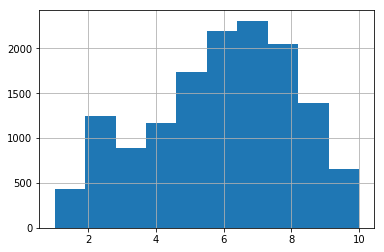

In [31]:
pd.Series(num_unique_sites).hist();

**Проверим с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально. Сделайте вывод. Ответом на второй вопрос в тесте будет файл со словом "YES" или "NO" в зависимости от того, распределено ли нормально число уникальных сайтов в сессии.**

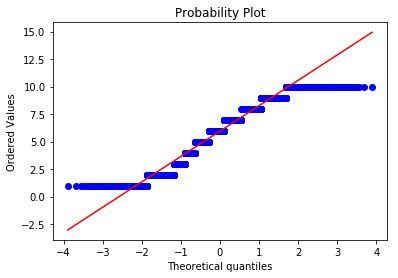

In [32]:
plt.figure(figsize=(6,4))
stats.probplot(pd.Series(num_unique_sites), dist="norm", plot=plt)
plt.show()

In [33]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(pd.Series(num_unique_sites)))

Shapiro-Wilk normality test, W-statistic: 0.954693, p-value: 0.000000


**ВЫВОД:**   
Видим, что согласно графического теста **Ку-Ку-график** и критерия **Шапиро-Уилка** у распределения числа уникальных сайтов в сессии нормальность **не наблюдается** (p-value << 0.05).   
Это дает основание предполагать, что этот параметр для различных пользователей имеет высокую степень **уникальности** и, следовательно, может быть достаточно **информативным признаком** в задаче идентификации пользователя.

**Проверим гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Для этого проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратим внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

In [37]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')
has_two_similar.mean()

0.95370172818433963

In [39]:
pi_val = stats.binom_test(has_two_similar.sum(), n=has_two_similar.shape[0], p=0.95, alternative = 'greater')
pi_val

0.022076537690726782

Поскольку **p-value < 0.05**, то на уровне **0.05** гипотеза **отвергается**.

**Для наглядности построим для этой доли 95% доверительный интервал Уилсона.**

In [41]:
wilson_interval = proportion_confint(has_two_similar.sum(), has_two_similar.shape[0], method = 'wilson')
print('[{} {}]'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

[0.95 0.957]


**Построим распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [45]:
site_freqs = pd.Series(train_df.drop('user_id', axis=1).values.ravel()).value_counts()

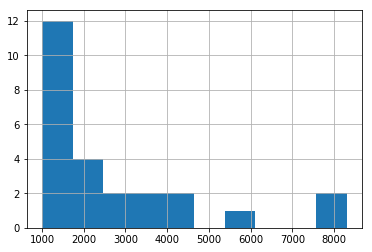

In [46]:
site_freqs[site_freqs >= 1000].hist();

**Построим 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Будем использовать столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Подвыборки возьмем из посчитанного списка частот посещений сайтов. Учтем, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлим границы интервала до 3 знаков после запятой.**

In [47]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [48]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [51]:
data = site_freqs.values
n_samples = site_freqs.index.max()

median_scores = list(map(np.mean, get_bootstrap_samples(data, n_samples, random_seed=17)))
boundaries = stat_intervals(median_scores, 0.05).round(3)

print("95% confidence interval:",  boundaries)

95% confidence interval: [ 22.514  35.756]


## Что еще можно сделать

- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это может пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков в следующей части)

В 3 части мы займемся визуальным анализом данных и построением признаков.

# <center>Часть 3. 
# <center>Визуальный анализ данных и построение признаков
## <center>Введение

В 3 части мы займемся визуальным анализом данных и построением признаков. Сначала мы построим и проанализируем несколько более очевидных признаков, а потом займемся "придумыванием" и анализом дополнительных признаков. Описание сделаем в виде Peer-Review, которое предполагает достаточную степень творчества.

**Темы 3 части:**
 - Построение признаков
 - Визуальный анализ данных
 - Дальнейшее построение признаков
 - Проверка построенных признаков

## <center> 3.1. Построение признаков

**Создадим на основе функций *prepare_train_set* и *prepare_sparse_train_set_window* из 2 части  новую – *prepare_train_set_with_fe*, (от "feature engineering"), которая из входящих данных создает следующие признаки:**
- `session_timespan` – продолжительность сессии (разница между максимальным и минимальным временем посещения сайтов в сессии, в секундах)
- `#unique_sites` – число уникальных сайтов в сессии 
- `start_hour` – час начала сессии (то есть час в записи минимального timestamp среди десяти)
- `day_of_week` – день недели (то есть день недели в записи минимального timestamp среди десяти)

Функция будет возвращать новый DataFrame (как возвращала функция *prepare_train_set*), только признаков будет на 4 больше. Они будут идти в следующем порядке: *site1*, ... *site10*, *session_timespan*, *#unique_sites*, *start_hour*, *day_of_week* и *user_id*.

**Обратим внимание, что прежние блоки в функции также немного модифицированы и оптимизированы.**   
В частности, для удобства сделаем часть аргументов необязательными. Например, новая функция сможет работать как с готовым словарем, так и БЕЗ него.

In [4]:
def prepare_train_set_with_fe(path_to_csv_files, site_freq_path=None, feature_names=None,
                                    session_length=10, window_size=None):
    ''' 
    Функция должна возвращать новый DataFrame.
    Признаки: site1, ... site10, session_timespan, #unique_sites, start_hour, day_of_week и user_id 
    '''
    # инициализация
    freq_vocabulary = {}    # словарь id сайтов
    data_mod = []    # модифицированный список закодированных сайтов с учетом окна
    data_datetime = []   # базовые данные с метками времени для формирования из них всех остальных временных признаков
    y = []      # целевая переменная (id пользователей)
    
    if site_freq_path is not None:            # если путь к словарю указан - считываем его
        # считываем частотный словарь
        with open(site_freq_path, 'rb') as pkl_file:
            freq_vocabulary = pickle.load(pkl_file)
    
    # подготовим пути для обхода и обойдем:
    for path in tqdm_notebook(glob(os.path.join(path_to_csv_files, 'user*.csv'))):
              
        # считаем файл с данными
        data_df = pd.read_csv(path, header=0)
        
        # если считан словарь - используем его для перекодировки, иначе - формируем словарь и параллельно перекодируем
        if site_freq_path is not None:
            # перекодировка с готовым словарём
            data = data_df['site'].apply(lambda x: freq_vocabulary[x][0])
        else:        
            # сформируем словарь и перекодируем site_string в site_id
            data = []
            for site_string in data_df['site']:
                id_freq = freq_vocabulary.setdefault(site_string, [len(freq_vocabulary) + 1, 0])[0]
                freq_vocabulary[site_string][1] += 1
                data.append(id_freq)
        
        # рассчитаем число рядов (row) для текущего пользователя
        window_size_actual = window_size if window_size is not None else session_length
        row = len(data) // window_size_actual + 1 if len(data) % window_size_actual != 0 \
                                                            else len(data) // window_size_actual
        
        ###################################################################################################################
        # формирование сессий для текущих значений session_length и window_size
        def sessions_forming(data, row, session_length, window_size):
            data = list(data)
            if window_size is not None:
                # добавляем нужное количество нанов (с ними удобнее, потом заменим нулями)
                data.extend([np.nan] * session_length)
                data_mod = []            
                for i in range(row):
                    data_mod.extend(data[(window_size * i):(window_size * i + session_length)])
                    
            else:
                # добавляем нужное количество нанов (с ними удобнее, потом заменим нулями)
                n_ext = session_length - len(data) % session_length if len(data) % session_length !=0 else 0
                data.extend([np.nan] * n_ext)
                data_mod = data
            
            return data_mod
        ####################################################################################################################
        
        # формируем и накапливаем модифицированный список закодированных сайтов с учетом окна
        data_mod_user_id = sessions_forming(data, row, session_length, window_size)
        data_mod.extend(data_mod_user_id)
                                 
        # формируем и накапливаем блок с временными данными аналогично сайтовому блоку
        data_datetime_id = sessions_forming(data_df['timestamp'].apply(pd.to_datetime), 
                                             row, session_length, window_size)
        data_datetime.extend(data_datetime_id)
                
        # сформируем и накопим вектор y "ответов", то есть user_id
        user_id = int(path[-8:-4]) # id пользователя
        col_user_id = [user_id] * row # forming columns with user_id
        y.extend(col_user_id)
        
    # расчитаем общее количество рядов в признаках
    rows = len(data_mod) // session_length
    
    # сформируем признаки site1, ... siteNN
    data_mod = np.array(data_mod)
    data_mod.resize((rows, session_length))
    data_mod_df = pd.DataFrame(data_mod, columns=['site' + str(i) for i in range(1, session_length + 1)])
    
    # формируем датафрейм с datetime (базовые данные для работа с временными метками)
    data_datetime = np.array(data_datetime)
    data_datetime.resize((rows, session_length))
    data_datetime_df = pd.DataFrame(data_datetime, columns=['datetime' + str(i) for i in range(1, session_length + 1)])

    # датафрейм с timestamp-метками
    data_timestamp_df = data_datetime_df.applymap(lambda x: pd.datetime.timestamp(x) 
                                                  if type(x) == pd._libs.tslib.Timestamp else np.nan)
    
    ###################### начинаем готовить датафрейм с признаками на выдачу    
    df = pd.DataFrame()
    
    # колонки с сайтами
    df[['site' + str(i) for i in range(1, session_length + 1)]] = \
                                    data_mod_df[['site' + str(i) for i in range(1, session_length + 1)]]
    
    # колонки с дельтой между заходами на сайты внутри сессии
    for j in range(1, session_length):
        df['time_diff' + str(j)] = data_timestamp_df.iloc[:, j] - data_timestamp_df.iloc[:, j - 1]

    # остальные признаки
    df['session_timespan'] = data_timestamp_df.max(axis=1, skipna=True) - data_timestamp_df.min(axis=1, skipna=True)
    df['#unique_sites'] = data_mod_df[['site' + str(i) for i in range(1, session_length + 1)]].nunique(axis=1, dropna=True)
    df['start_hour'] = data_datetime_df['datetime1'].apply(lambda x: x.hour)
    df['day_of_week'] = data_datetime_df['datetime1'].apply(lambda x: x.weekday())
    
    df['target'] = y # целевая переменная
    
    if feature_names is not None:
        df = df[feature_names]
    
    return df.fillna(0).astype(int)

**Применим функцию *prepare_train_set_with_fe* к данным по 10 пользователям, укажем *session_length*=10.**

In [8]:
%%time
train_data_10users = prepare_train_set_with_fe(os.path.join(PATH_TO_DATA, 
                                                         '10users'), 
                     site_freq_path=os.path.join(PATH_TO_DATA, 
                                              'site_freq_10users.pkl'),
                     feature_names=feature_names, session_length=10)

A Jupyter Widget


Wall time: 17.3 s


In [9]:
train_data_10users.head()

site1  site2  site3  site4  site5  site6  site7  site8  site9  site10  \
0      1      2      3      4      3      3      4      3      5       3   
1      6      7      8      9      3     10     11     12     13      14   
2     14      4     14     14     15     16      6     17     18      14   
3     19     20     19     14     14     14     14     21     22      23   
4     24     14     15     25     26     27     28     29     30      29   

   time_diff1  time_diff2  time_diff3  time_diff4  time_diff5  time_diff6  \
0          10           0           0           1          20           1   
1           1           0         163         105           0           1   
2           0          14           1         242           0           0   
3           2           1           0           1          25           1   
4           1           0           1           1           1           0   

   time_diff7  time_diff8  time_diff9  session_timespan  #unique_sites  \
0           0           1           0                33              5   
1           3           3           8               284             10   
2           1           0           0               258              7   
3           0           0           0                30              6   
4           1           1           0                 6              9   

   start_hour  day_of_week  target  
0           8            4      31  
1           8            4      31  
2           8            4      31  
3           8            4      31  
4           8            4      31

**Примените функцию *prepare_train_set_with_fe* к данным по 150 пользователям, укажем *session_length*=10.**

In [10]:
%%time
train_data_150users = prepare_train_set_with_fe(os.path.join(PATH_TO_DATA, 
                                                         '150users'), 
                      site_freq_path=os.path.join(PATH_TO_DATA, 
                                              'site_freq_150users.pkl'),
                      feature_names=feature_names, session_length=10)

A Jupyter Widget


Wall time: 2min 45s


**Сохраним в pickle-файлы признаки *session_timespan*, *#unique_sites*, *start_hour* и *day_of_week* для 10 и 150 пользователей.**

In [11]:
new_features_10users = train_data_10users[['session_timespan', '#unique_sites', 'start_hour', 'day_of_week']]
new_features_150users = train_data_150users[['session_timespan', '#unique_sites', 'start_hour', 'day_of_week']]

In [12]:
with open(os.path.join(PATH_TO_DATA, 
                       'new_features_10users.pkl'), 'wb') as new_features_10users_pkl:
    pickle.dump(new_features_10users, new_features_10users_pkl)
with open(os.path.join(PATH_TO_DATA, 
                       'new_features_150users.pkl'), 'wb') as new_features_150users_pkl:
    pickle.dump(new_features_150users, new_features_150users_pkl)

## <center> 3.2. Визуальный анализ данных

**Для наглядности дадим пользователям имена и ассоциируем с ними цвета.**

In [13]:
id_name_dict = {128: 'Mary-Kate', 39: 'Ashley', 207: 'Lindsey', 127: 'Naomi', 237: 'Avril',
               33: 'Bob', 50: 'Bill', 31: 'John', 100: 'Dick', 241: 'Ed'}
train_data_10users['user_id'] = train_data_10users['target'].map(id_name_dict)

In [14]:
color_dic = {'Mary-Kate': 'pink', 'Ashley': 'darkviolet', 'Lindsey':'blueviolet', 
             'Naomi': 'hotpink', 'Avril': 'orchid', 
             'Bob': 'firebrick', 'Bill': 'gold', 'John': 'forestgreen', 
             'Dick': 'slategrey', 'Ed':'brown'}

**Построим гистограмму распределения длины сессии в секундах (*session_timespan*). Ограничим по *x* значением 200 (иначе слишком тяжелый хвост). Выберем цвет *darkviolet*, и подпишем оси.**

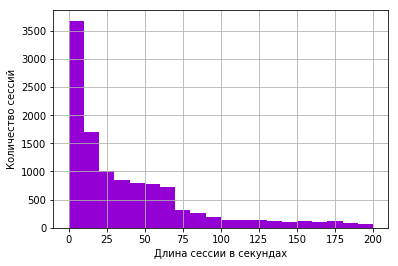

In [15]:
train_data_10users['session_timespan'][train_data_10users['session_timespan'] <= 200].hist(color='darkviolet', bins=20)
plt.xlabel('Длина сессии в секундах')
plt.ylabel('Количество сессий');

**Построим гистограмму распределения числа уникальных сайтов в сессии (*#unique_sites*). Выберем цвет *aqua*, подпишем оси.**

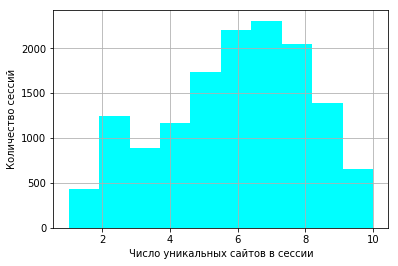

In [16]:
train_data_10users['#unique_sites'].hist(color='aqua', bins=10)
plt.xlabel('Число уникальных сайтов в сессии')
plt.ylabel('Количество сессий');

**Построим гистограммы распределения числа уникальных сайтов в сессии (*#unique_sites*) для каждого из 10 пользователей по отдельности. Применим *subplots*, чтоб разместить все 10 картинок на одной большой. Пометим легендой каждую картинку, на легенде напишем имя пользователя. Для каждого пользователя раскрасим гистограмму его/ее цветом (*color_dic*). Подпишем оси по-русски в каждой из 10 гистограмм.**

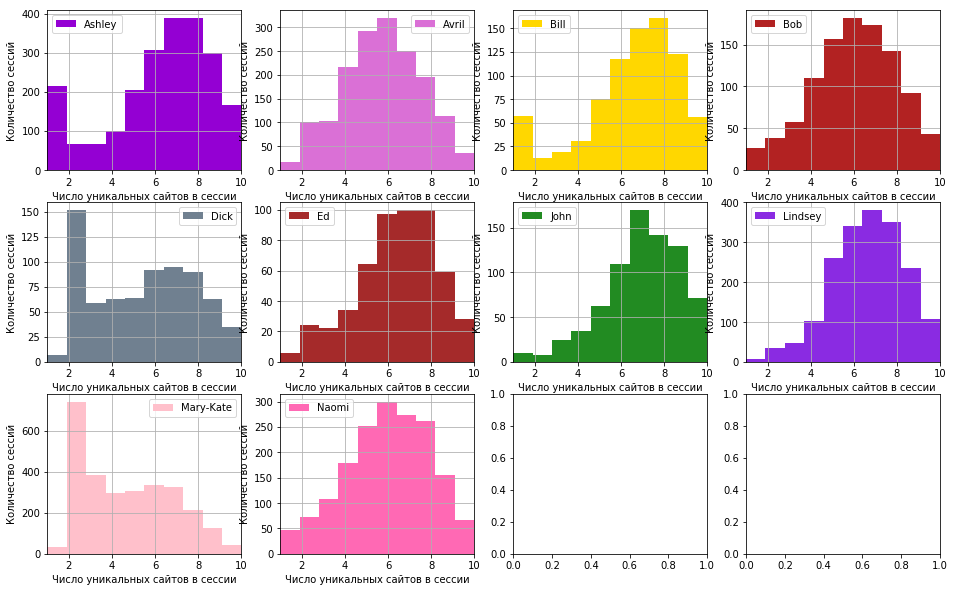

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(pd.groupby(train_data_10users, 'user_id')): 
    col = '#unique_sites'
    sub_df[col].hist(ax=axes[idx // 4, idx % 4], color=color_dic[user], label=user,
                               bins=(sub_df[col].max() - sub_df[col].min() + 1))
    axes[idx // 4, idx % 4].legend()
    axes[idx // 4, idx % 4].set_xlim([1, 10])
    axes[idx // 4, idx % 4].set_xlabel('Число уникальных сайтов в сессии')
    axes[idx // 4, idx % 4].set_ylabel('Количество сессий')

**Построим гистограмму распределения часа начала сессии (*start_hour*). Сделаем гистограмму цвета *darkgreen*, подпишем оси по-русски.**

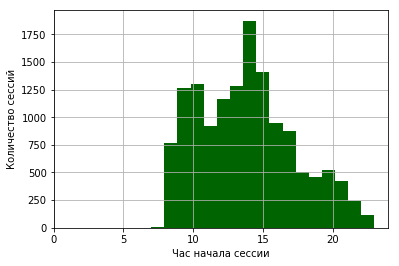

In [18]:
train_data_10users['start_hour'].hist(color='darkgreen', 
                                      bins=(sub_df['start_hour'].max() - sub_df['start_hour'].min() + 1))
plt.xlim([0, 24])
plt.xlabel('Час начала сессии')
plt.ylabel('Количество сессий');

**Построим гистограммы распределения часа начала сессии (*start_hour*) для каждого из 10 пользователей по отдельности. Применим *subplots*, чтоб разместить все 10 картинок на одной большой. Пометим легендой каждую картинку, на легенде напишем имя пользователя. Для каждого пользователя раскрасим гистограмму его/ее цветом (*color_dic*). Подпишем оси по-русски в каждой из 10 гистограмм.**

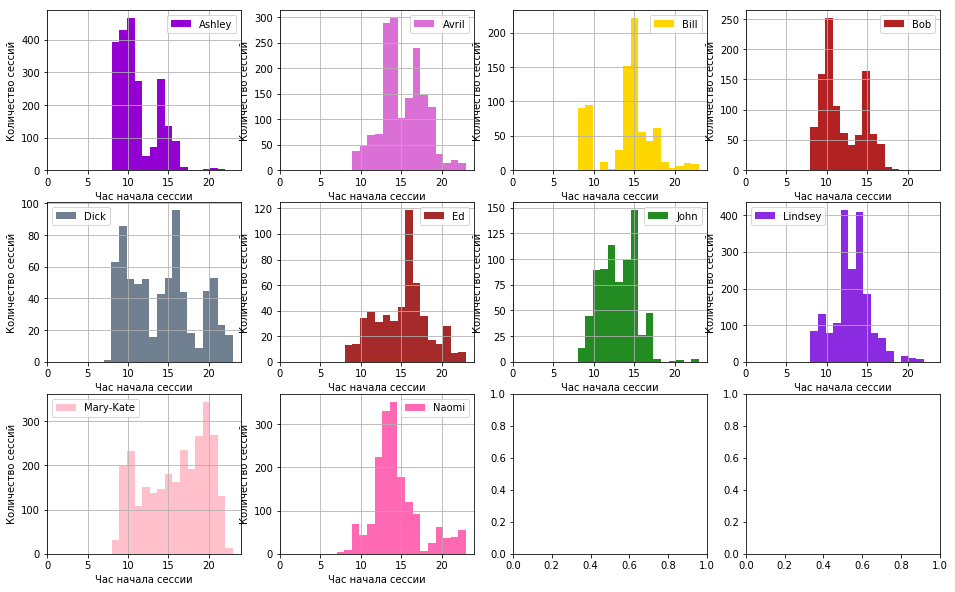

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(pd.groupby(train_data_10users, 'user_id')): 
    col = 'start_hour'
    sub_df[col].hist(ax=axes[idx // 4, idx % 4], color=color_dic[user], label=user,
                               bins=(sub_df[col].max() - sub_df[col].min() + 1))
    axes[idx // 4, idx % 4].legend()
    axes[idx // 4, idx % 4].set_xlim([0, 24])
    axes[idx // 4, idx % 4].set_xlabel('Час начала сессии')
    axes[idx // 4, idx % 4].set_ylabel('Количество сессий')

**Построим гистограмму распределения дня недели, в который началась сессия (*day_of_week*). Сделаем гистограмму цвета *sienna*, подпишем оси по-русски.**

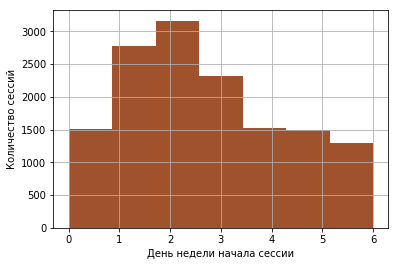

In [20]:
train_data_10users['day_of_week'].hist(color='sienna', bins=7)
#plt.xlim([-0, 6])
plt.xlabel('День недели начала сессии')
plt.ylabel('Количество сессий');

**Построим гистограммы распределения дня недели, в который началась сессия (*day_of_week*) для каждого из 10 пользователей по отдельности. Применим *subplots*, чтоб разместить все 10 картинок на одной большой. Изменим метки по оси *X* на ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'] – метод *set_xticklabels*. Пометим легендой каждую картинку, на легенде напишем имя пользователя. Для каждого пользователя раскрасим гистограмму его/ее цветом (*color_dic*). Подпишем по-русски название каждой из 10 гистограмм.**

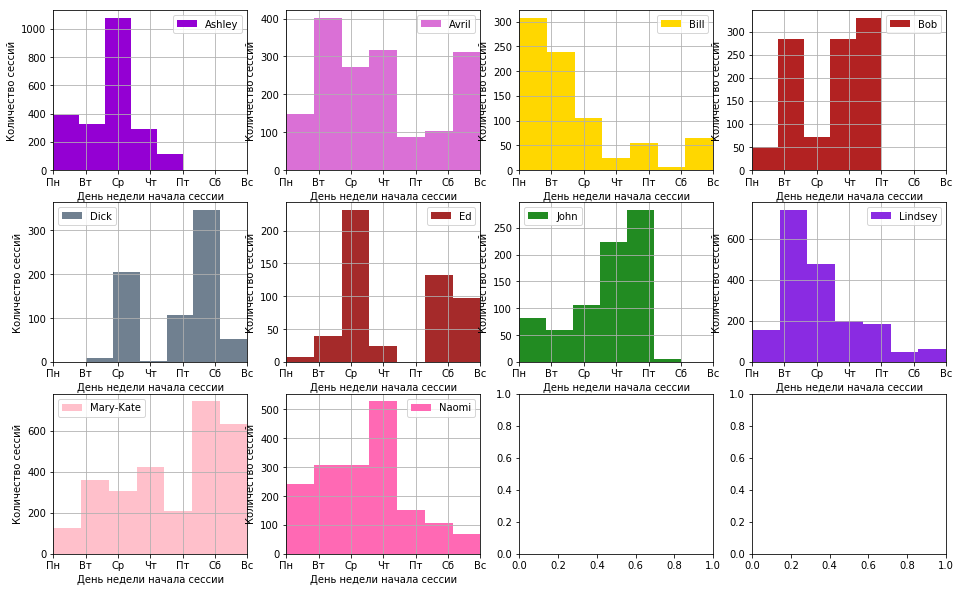

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(pd.groupby(train_data_10users, 'user_id')):
    col = 'day_of_week'
    sub_df[col].hist(ax=axes[idx // 4, idx % 4], color=color_dic[user], label=user,
                               bins=(sub_df[col].max() - sub_df[col].min() + 1))
    axes[idx // 4, idx % 4].legend()
    axes[idx // 4, idx % 4].set_xticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
    axes[idx // 4, idx % 4].set_xlim([0, 6])
    axes[idx // 4, idx % 4].set_xlabel('День недели начала сессии')
    axes[idx // 4, idx % 4].set_ylabel('Количество сессий')

**Сделаем ВЫВОДЫ про каждого пользователя по построенным графикам.**

Распределения рассмотренных выше величин для пользователей **различаются** и могут служить в соответствующей степени их **характеристиками**. 
- В частности, сравнивая визуально гистограмму распределения числа уникальных сайтов в сессии (**#unique_sites**) с соответствущими распределениями отдельных пользователей видно, что **отдельные распределения отличаются от усредненного**. Усредненное имеет глобальный пик **на 7** и **локальный пик на 2**, в то время как для локальных имеет место:
    - **Ashley**: пик на 1 и 8

    - **Avril**: пик на 6

    - **Bill**: пик на 1 и 8

    - **Bob**: пик на 6

    - **Dick**: пик на 2 и 7 (слабо выраженый)

    - **Ed**: пик на 7

    - **John**: пик на 7

    - **Lindsey**: пик на 7

    - **Mary-Kate**: пик на 2

    - **Naomi**: пик на 6


- аналогично, сравнивая визуально гистограмму распределения часа начала сессии (**start_hour**) с соответствущими распределениями отдельных пользователей видно, что **отдельные распределения отличаются от усредненного**. Усредненное имеет глобальный пик **на 14** и **локальный пик на 10**, в то время как для локальных имеет место:
    - **Ashley**: пик на 10 и 14

    - **Avril**: пик на 13 и 17

    - **Bill**: пик на 9 и 15

    - **Bob**: пик на 10 и 15

    - **Dick**: 3 пика - на 10, 14 и 21

    - **Ed**: пик на 16

    - **John**: пик на 12 и 15

    - **Lindsey**: пик на 12 и 14

    - **Mary-Kate**: пик на 10 и 19

    - **Naomi**: пик на 14


- и то же справедливо для дня начала сессии (**day_of_week**): усредненное распределение (**пик на 2**) достаточно сильно отличается от распределений индивидуальных пользователей:
    - **Ashley**: пик на ср.    

    - **Avril**: пик на вт. и вс.

    - **Bill**: пик на пн.

    - **Bob**: пик на вт. и пт.

    - **Dick**: пик на ср. и сб.

    - **Ed**: пик на ср. и сб.

    - **John**: пик на пт (выходные - провал)

    - **Lindsey**: пик на вт.

    - **Mary-Kate**: пик на выходные

    - **Naomi**: пик на чт.


**Загрузим сохраненный ранее в pickle-файл частотный словарь сайтов для 10 пользователей. **

In [22]:
with open(os.path.join(PATH_TO_DATA,'site_freq_10users.pkl'), 'rb') as pkl_file:
        site_freq_10users = pickle.load(pkl_file)

**Определим топ-10 самых посещаемых сайтов (*top10_sites*) и соответствующие кол-ва посещений (*top10_freqs*).**

In [23]:
top10_freqs = list(map(lambda x: x[1][1], sorted(site_freq_10users.items(), key=lambda x: x[1][1], reverse=True)))[:10]
top10_sites = list(map(lambda x: x[0], sorted(site_freq_10users.items(), key=lambda x: x[1][1], reverse=True)))[:10]

**Нарисуем *seaborn barplot*, показывающий частоты посещений топ-10 сайтов. Сделайте подписи сайтов вертикальными, иначе они сольются (*xticks*).**

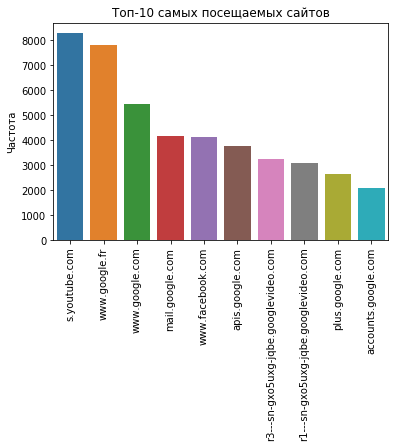

In [24]:
sns.barplot(top10_sites, top10_freqs)
plt.title('Топ-10 самых посещаемых сайтов')
plt.ylabel('Частота')
plt.xticks(rotation=90);

## <center> 3.4. Дальнейшее построение признаков

Этот раздел творческий, тут мы собираемся придумать, как еще учесть время посещения веб-страниц и прочие признаки. 

В следующей части мы будем использовать "мешок" сайтов  для классификации сессий по принадлежности разным пользователям, а эти новые признаки, которые мы сейчас создадим, потом добавим и посмотрим, улучшается ли модель. Поэтому создадим их в виде отдельных матриц и сохранить также отдельно.  

В этом разделе мы построим и визуально исследуем самые разные признаки (попробуем привлечь фантазию), в том числе:
- год, месяц и день начала сессии
- час начала сессии (с учетом года, месяца и дня)
- время суток
- среднее время пребывания на сайте, посчитать можно, скажем, для топ-30 популярных сайтов
- индикаторы посещения популярных сайтов (скажем, тоже для топ-30 популярных сайтов)
- частота посещения Facebook
- ...

**Для этого напишем функцию, создающую новые признаки, и применим ее к исходным данным – каталогам с 10 и 150 файлами. Сделаем это только для набора данных, полученного с параметрами *session_length=10* и *window_size=10*. Сериализуем полученные матрицы с помощью pickle. Функция сможет возвращать как только новые признаки, так и старые с новыми.**

In [29]:
def feature_engineering(path_to_csv_files, site_freq_path=None, feature_names=None, 
                        old_features=False, session_length=10, window_size=None):
    ''' 
    Возвращает Датафрейм с фичами.
    
    path_to_csv_files - путь к папке с сессиями пользователей.
    
    site_freq_path - путь к готовому словарю. Если None - словарь создается по-новому.
    
    feature_names - список выводимых фич. Если None - выводятся все рассчитанные фичи. 
        Этот список может содержать только следующие элементы:
            новые фичи - 
        ['start_year', 'start_month', 'start_day', 'time_of_day', 'mean_site_time',
         'freq_top30_0_4', 'freq_top30_1_2', 'freq_top30_2_1', ...(и т.д. по всем топ30 сайтов, 
         последняя цифра в названии элемента - код сайта, может меняться),
         'weekend']
           
           старые фичи (выводятся только если old_features=True) -
       ['site1', 'site2', 'site3', 'site4', 'site5', 'site6', 'site7', 'site8', 'site9', 'site10',
       'time_diff1', 'time_diff2', 'time_diff3', 'time_diff4', 'time_diff5',
       'time_diff6', 'time_diff7', 'time_diff8', 'time_diff9',
       'session_timespan', '#unique_sites', 'start_hour', 'day_of_week',
       'target']
    
    old_features - выводить или не выводить старые фичи.
    
    session_length - размер сессии.
    
    window_size - размер окна. Если None - окна как такового нет, все режется только на сессии (аналогично 
        как если бы window_size = session_length)
    
    '''
    # инициализация
    freq_vocabulary = {}    # словарь id сайтов
    data_mod = []    # модифицированный список закодированных сайтов с учетом окна
    data_datetime = []   # базовые данные с метками времени для формирования из них всех остальных временных признаков
    y = []      # целевая переменная (id пользователей)
    
    if site_freq_path is not None:            # если путь к словарю указан - считываем его
        # считываем частотный словарь
        with open(site_freq_path, 'rb') as pkl_file:
            freq_vocabulary = pickle.load(pkl_file)
    
    # подготовим пути для обхода и обойдем:
    for path in tqdm_notebook(glob(os.path.join(path_to_csv_files, 'user*.csv'))):
              
        # считаем файл с данными
        data_df = pd.read_csv(path, header=0)
        
        # если считан словарь - используем его для перекодировки, иначе - формируем словарь и параллельно перекодируем
        if site_freq_path is not None:
            # перекодировка с готовым словарём
            data = data_df['site'].apply(lambda x: freq_vocabulary[x][0])
        else:        
            # сформируем словарь и перекодируем site_string в site_id
            data = []
            for site_string in data_df['site']:
                id_freq = freq_vocabulary.setdefault(site_string, [len(freq_vocabulary) + 1, 0])[0]
                freq_vocabulary[site_string][1] += 1
                data.append(id_freq)
        
        # рассчитаем число рядов (row) для текущего пользователя
        window_size_actual = window_size if window_size is not None else session_length
        row = len(data) // window_size_actual + 1 if len(data) % window_size_actual != 0 \
                                                            else len(data) // window_size_actual
        
        ###################################################################################################################
        # формирование сессий для текущих значений session_length и window_size
        def sessions_forming(data, row, session_length, window_size):
            data = list(data)
            if window_size is not None:
                # добавляем нужное количество нанов (с ними удобнее, потом заменим нулями)
                data.extend([np.nan] * session_length)
                data_mod = []            
                for i in range(row):
                    data_mod.extend(data[(window_size * i):(window_size * i + session_length)])
                    
            else:
                # добавляем нужное количество нанов (с ними удобнее, потом заменим нулями)
                n_ext = session_length - len(data) % session_length if len(data) % session_length !=0 else 0
                data.extend([np.nan] * n_ext)
                data_mod = data
            
            return data_mod
        ####################################################################################################################
        
        # формируем и накапливаем модифицированный список закодированных сайтов с учетом окна
        data_mod_user_id = sessions_forming(data, row, session_length, window_size)
        data_mod.extend(data_mod_user_id)
                                 
        # формируем и накапливаем блок с временными данными аналогично сайтовому блоку
        data_datetime_id = sessions_forming(data_df['timestamp'].apply(lambda x: pd.to_datetime(x)), 
                                             row, session_length, window_size)
        data_datetime.extend(data_datetime_id)
                
        # сформируем и накопим вектор y "ответов", то есть user_id
        user_id = int(path[-8:-4]) # id пользователя
        col_user_id = [user_id] * row # forming columns with user_id
        y.extend(col_user_id)
        
    # рассчитаем общее количество рядов в признаках
    rows = len(data_mod) // session_length
    
    # сформируем признаки site1, ... siteNN
    data_mod = np.array(data_mod)
    data_mod.resize((rows, session_length))
    data_mod_df = pd.DataFrame(data_mod, columns=['site' + str(i) for i in range(1, session_length + 1)])
    
    # формируем датафрейм с datetime (базовые данные для работа с временными метками)
    data_datetime = np.array(data_datetime)
    data_datetime.resize((rows, session_length))
    data_datetime_df = pd.DataFrame(data_datetime, columns=['datetime' + str(i) for i in range(1, session_length + 1)])

    # датафрейм с timestamp-метками
    data_timestamp_df = data_datetime_df.applymap(lambda x: pd.datetime.timestamp(x) 
                                                  if type(x) == pd._libs.tslib.Timestamp else np.nan)
    
    ###################### начинаем готовить датафрейм с признаками на выдачу   
    df = pd.DataFrame()
    
    # год начала сессии
    df['start_year'] = data_datetime_df['datetime1'].apply(lambda x: x.year)
    
    # месяц начала сессии
    df['start_month'] = data_datetime_df['datetime1'].apply(lambda x: x.month)
    
    # день начала сессии
    df['start_day'] = data_datetime_df['datetime1'].apply(lambda x: x.day)
    
    # время суток (06-12 - утро(1), 12-19 - день(2), 19-24 - вечер(3), 00-06 - ночь(4))
    df['time_of_day'] = data_datetime_df['datetime1'].apply(lambda x:  1 if x.hour >  6 and x.hour <= 12 else 
                                                                       2 if x.hour > 12 and x.hour <= 19 else
                                                                       3 if x.hour > 19 and x.hour <= 24 else
                                                                       4)
    
    # среднее время пребывания на сайте для топ-30 популярных сайтов (усредненное по всем топ-30)
    top30_sites_id = list(map(lambda x: x[1][0], sorted(freq_vocabulary.items(), key=lambda x: x[1][1], reverse=True)))[:30]
    top30_index = data_mod_df.iloc[:, :-1].applymap(lambda x: x in top30_sites_id)
    top30_index.columns = ['time_diff' + str(j) for j in range(1, session_length)]
    
    time_diff_df = pd.DataFrame()
    for j in range(1, session_length):
        time_diff_df['time_diff' + str(j)] = data_timestamp_df.iloc[:, j] - data_timestamp_df.iloc[:, j - 1]
        
    df['mean_site_time'] = time_diff_df[top30_index].mean(axis=1, skipna=True)
    
    # частота посещения топ-30 популярных сайтов
    for i, id_ in enumerate(top30_sites_id):
        df['freq_top30_{}_{}'.format(i, id_)] = data_mod_df.applymap(lambda x: x == id_).sum(axis=1)
        
    # индикатор уикэнда в день начала сессии
    df['weekend'] = data_datetime_df['datetime1'].apply(lambda x: 1 if x.weekday() in [5, 6] else 0)
   
    #################### блок со СТАРЫМИ фичами
    if old_features:     
        # колонки с сайтами
        df[['site' + str(i) for i in range(1, session_length + 1)]] = \
                                       data_mod_df[['site' + str(i) for i in range(1, session_length + 1)]]

        # колонки с дельтой между заходами на сайты внутри сессии
        df = pd.concat([df, time_diff_df], axis=1)
#         for j in range(1, session_length):
#             df['time_diff' + str(j)] = data_timestamp_df.iloc[:, j] - data_timestamp_df.iloc[:, j - 1]

        # остальные признаки
        df['session_timespan'] = data_timestamp_df.max(axis=1, skipna=True) - data_timestamp_df.min(axis=1, skipna=True)

        df['#unique_sites'] = data_mod_df[['site' + str(i) for i in range(1, session_length + 1)]].nunique(axis=1, dropna=True)

        df['start_hour'] = data_datetime_df['datetime1'].apply(lambda x: x.hour)

        df['day_of_week'] = data_datetime_df['datetime1'].apply(lambda x: x.weekday())


    df['target'] = y
    
    if feature_names is not None:
        df = df[feature_names]

    return df.fillna(0).astype(int)

#### Посчитаем новые фичи для 10 и 150 пользователей.

In [32]:
%%time
new_features_10users = feature_engineering(os.path.join(PATH_TO_DATA, '10users'))

A Jupyter Widget


Wall time: 17.9 s


In [33]:
new_features_10users.head()

start_year  start_month  start_day  time_of_day  mean_site_time  \
0        2013           11         15            1               0   
1        2013           11         15            1               0   
2        2013           11         15            1               7   
3        2013           11         15            1               0   
4        2013           11         15            1               1   

   freq_top30_0_210  freq_top30_1_51  freq_top30_2_4  freq_top30_3_183  \
0                 0                0               2                 0   
1                 0                0               0                 0   
2                 0                0               1                 0   
3                 0                0               0                 0   
4                 0                0               0                 0   

   freq_top30_4_15  freq_top30_5_52  freq_top30_6_700   ...    \
0                0                0                 0   ...     
1                0                0                 0   ...     
2                1                0                 0   ...     
3                0                0                 0   ...     
4                1                0                 0   ...     

   freq_top30_20_185  freq_top30_21_70  freq_top30_22_191  freq_top30_23_576  \
0                  0                 0                  0                  0   
1                  0                 0                  0                  0   
2                  0                 0                  0                  0   
3                  0                 0                  0                  0   
4                  0                 0                  0                  0   

   freq_top30_24_1026  freq_top30_25_1602  freq_top30_26_186  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   
3                   0                   0                  0   
4                   0                   0                  0   

   freq_top30_27_1949  freq_top30_28_972  freq_top30_29_188  weekend  target  
0                   0                  0                  0        0      31  
1                   0                  0                  0        0      31  
2                   0                  0                  0        0      31  
3                   0                  0                  0        0      31  
4                   0                  0                  0        0      31  

[5 rows x 37 columns]

In [34]:
%%time
new_features_150users = feature_engineering(os.path.join(PATH_TO_DATA, '150users'))

A Jupyter Widget


Wall time: 2min 51s


In [35]:
new_features_150users.head()

start_year  start_month  start_day  time_of_day  mean_site_time  \
0        2013           11         15            1               7   
1        2013           11         15            1               0   
2        2013           11         15            1              16   
3        2013           11         15            1               2   
4        2013           11         15            1               2   

   freq_top30_0_1  freq_top30_1_3  freq_top30_2_41  freq_top30_3_2  \
0               4               2                0               2   
1               0               1                0               0   
2               5               1                0               0   
3               4               0                0               0   
4               3               0                0               0   

   freq_top30_4_181  freq_top30_5_214  freq_top30_6_28   ...    \
0                 0                 0                0   ...     
1                 0                 0                0   ...     
2                 0                 0                0   ...     
3                 0                 0                0   ...     
4                 0                 0                0   ...     

   freq_top30_20_182  freq_top30_21_1201  freq_top30_22_6  freq_top30_23_2165  \
0                  0                   0                0                   0   
1                  0                   0                1                   0   
2                  0                   0                0                   0   
3                  0                   0                0                   0   
4                  0                   0                0                   0   

   freq_top30_24_244  freq_top30_25_180  freq_top30_26_1463  \
0                  0                  0                   0   
1                  0                  0                   0   
2                  0                  0                   0   
3                  0                  0                   0   
4                  0                  0                   0   

   freq_top30_27_106  freq_top30_28_253  freq_top30_29_2707  weekend  target  
0                  0                  0                   0        0       6  
1                  0                  0                   0        0       6  
2                  0                  0                   0        0       6  
3                  0                  0                   0        0       6  
4                  0                  0                   0        0       6  

[5 rows x 37 columns]

#### Попробуем то же, но с другим окном:  
session_length=10, window_size=7

In [36]:
%%time
new_features_10users_s10_w7 = feature_engineering(os.path.join(PATH_TO_DATA, '10users'), session_length=10, window_size=7)

A Jupyter Widget


Wall time: 19.1 s


**Проанализируем новые признаки.**

Не будем перегружать отчет кодом и графиками новых признаков, при необходимости это можно будет посмотреть в [полной версии работы](https://github.com/shereshevskiy/mipt_ya_ml_spec_final_report1_user_identification/tree/master/capstone_user_identification_fullversion). Здесь отметим основные выводы.    

Анализ делается аналогичным предыдущему разделу способом. Делаем это в цикле (приведем только код):

``` python
for feature in new_features_10users.columns[:-2]:
    new_features_10users[feature].hist(color='aqua', bins=10)
    plt.title('Усредненный по пользователям признак ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Количество сессий')
    plt.show()

    print('Распределение признака ' + feature + ' для каждого пользователя')

    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

    # как вариант, можно и по-другому
    for idx, (user, sub_df) in  enumerate(pd.groupby(new_features_10users, 'user_id')): 
        col = feature
        sub_df[col].hist(ax=axes[idx // 4, idx % 4], color=color_dic[user], label=user, bins=20)
#                                    bins=(sub_df[col].max() - sub_df[col].min() + 1))
        axes[idx // 4, idx % 4].legend()
    #     axes[idx // 4, idx % 4].set_xlim([1, 10])
        axes[idx // 4, idx % 4].set_xlabel(feature)
        axes[idx // 4, idx % 4].set_ylabel('Количество сессий')

    plt.show()
```

```python
for feature in new_features_10users_s10_w7.columns[:-2]:
    new_features_10users[feature].hist(color='aqua', bins=10)
    plt.title('Усредненный по пользователям признак ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Количество сессий')
    plt.show()

    print('Распределение признака ' + feature + ' для каждого пользователя')

    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

    # как вариант, можно и по-другому
    for idx, (user, sub_df) in  enumerate(pd.groupby(new_features_10users, 'user_id')): 
        col = feature
        sub_df[col].hist(ax=axes[idx // 4, idx % 4], color=color_dic[user], label=user, bins=20)
#                                    bins=(sub_df[col].max() - sub_df[col].min() + 1))
        axes[idx // 4, idx % 4].legend()
    #     axes[idx // 4, idx % 4].set_xlim([1, 10])
        axes[idx // 4, idx % 4].set_xlabel(feature)
        axes[idx // 4, idx % 4].set_ylabel('Количество сессий')

    plt.show()
    ```

**АНАЛИЗ:**   
Из исследуемых признаков, все признаки, кроме **mean_site_time** - более-менее адекватны. Этот признак, по крайней мере как он выглядит сейчас, пока не внушает доверия. В частности, там иногда встречаются аномально большие значения (как если бы пользователь включил компьютер, зашел на сайт и уехал, например, на работу). Скорее всего, большие значения здесь - следствие того, что сюда вклинилось время **между** сессиями, поэтому в таком виде признак мало информативен. В будущем это можно учесть, если соответствующим образом обработать это обстоятельство.    

А пока для более грубой оценки просто посмотрим на этот признак **еще раз** внимательнее, ограничив правый хвост **на 200**:

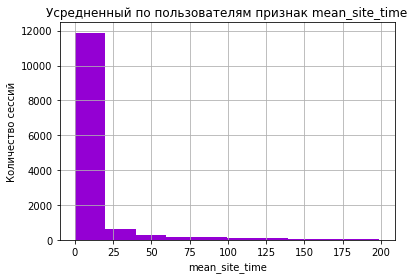

Распределение признака mean_site_time для каждого пользователя


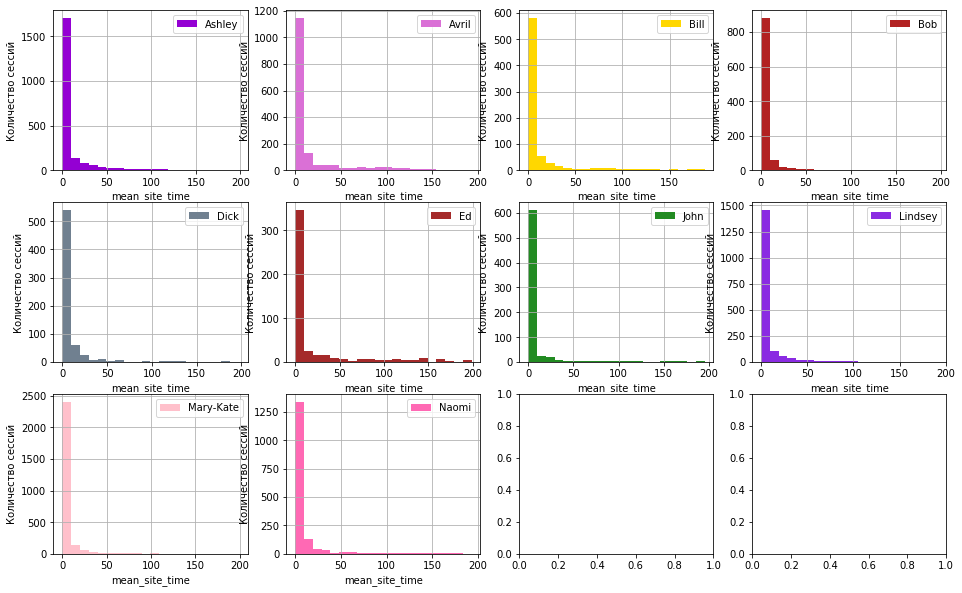

In [44]:
feature = 'mean_site_time'
new_features_10users[feature][new_features_10users[feature] < 200].hist(color='darkviolet', bins=10)
plt.title('Усредненный по пользователям признак ' + feature)
plt.xlabel(feature)
plt.ylabel('Количество сессий')
plt.show()

print('Распределение признака ' + feature + ' для каждого пользователя')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(pd.groupby(new_features_10users, 'user_id')): 
    col = feature
    sub_df[col][sub_df[col] < 200].hist(ax=axes[idx // 4, idx % 4], color=color_dic[user], label=user, bins=20)
#                                    bins=(sub_df[col].max() - sub_df[col].min() + 1))
    axes[idx // 4, idx % 4].legend()
#     axes[idx // 4, idx % 4].set_xlim([1, 10])
    axes[idx // 4, idx % 4].set_xlabel(feature)
    axes[idx // 4, idx % 4].set_ylabel('Количество сессий')

plt.show()

**Вывод по "mean_site_time"**:   
на мой взгляд, этот признак одинаков для разных пользователей и по этой причине не информативен. **Исключим его**.

**ОБЩИЙ ВЫВОД ПО НОВЫМ ПРИЗНАКАМ:**   
Признак "**mean_site_time**" - не информативен и исключается.   
Остальные признаки более или менее характеризуют целевой признак. На этом этапе пока не вижу необходимости на основе визуального анализа что-то еще убирать. Возможно, дальше будет понятнее.

**В конце сохраним в pickle-файлы только те признаки, которые, как мы пока предполагаем, помогут идентифицировать пользователя более точно. Это касается и признаков, которые мы создали в начале (*session_timespan, #unique_sites, start_hour, day_of_week*), и дополнительных, созданных позже.**

In [45]:
selected_features_10users_list = list(new_features_10users.columns) # список для отбора фич
selected_features_10users_list.remove('mean_site_time') # удаляем фичу 'mean_site_time'

selected_features_150users_list = list(new_features_150users.columns) # список для отбора фич
selected_features_150users_list.remove('mean_site_time') # удаляем фичу 'mean_site_time'

In [46]:
# сохраняем отобранные признаки
selected_features_10users = new_features_10users[selected_features_10users_list].iloc[:, :-2]
selected_features_150users = new_features_150users[selected_features_150users_list].iloc[:, :-1]

In [47]:
with open(os.path.join(PATH_TO_DATA, 
                       'selected_features_10users.pkl'), 'wb') as selected_features_10users_pkl:
    pickle.dump(selected_features_10users, selected_features_10users_pkl, 
                protocol=2)
with open(os.path.join(PATH_TO_DATA, 
                       'selected_features_150users.pkl'), 'wb') as selected_features_150users_pkl:
    pickle.dump(selected_features_150users, selected_features_150users_pkl, 
                protocol=2)

## Что еще можно сделать
Что еще можно добавить по 3 части проекта:
- IPython-widgets, интерактив и анимация (стоящие статьи по этому ремеслу – [раз](https://habrahabr.ru/post/308162/) и  [два](https://habrahabr.ru/company/ods/blog/323210/))
- можно попробовать изобразить исходные данные в некотором пространстве, например, Word2Vec, потом выделить главные компоненты или t-SNE  (только пользуйтесь эффективными реализациями типа [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE), не Sklearn) и раскрасить по целевому классу. Но нет гарантий, что получится что-то значимо отличающееся от каши

Кое что мы попробуем в дальнейшем, и в следующей части мы наконец приступим к обучению моделей классификации. 

# <center>Часть 4. 
# <center>Сравнение алгоритмов классификации
## <center>Введение

Теперь мы наконец подойдем к обучению моделей классификации, сравним на кросс-валидации несколько алгоритмов, разберемся, какие параметры длины сессии (*session_length* и *window_size*) лучше использовать. Также для выбранного алгоритма построим кривые валидации (как качество классификации зависит от одного из гиперпараметров алгоритма) и кривые обучения (как качество классификации зависит от объема выборки).

**Темы 4 части:**
- Сравнение нескольких алгоритмов на сессиях из 10 сайтов
- Выбор параметров – длины сессии и ширины окна
- Идентификация  конкретного пользователя и кривые обучения

## <center>4.1. Сравнение нескольких алгоритмов на сессиях из 10 сайтов

**Загрузим сериализованные ранее объекты *X_sparse_10users* и *y_10users*, соответствующие обучающей выборке для 10 пользователей.**

In [3]:
with open(os.path.join(PATH_TO_DATA, 
         'X_sparse_10users.pkl'), 'rb') as X_sparse_10users_pkl:
    X_sparse_10users = pickle.load(X_sparse_10users_pkl)
with open(os.path.join(PATH_TO_DATA, 
                       'y_10users.pkl'), 'rb') as y_10users_pkl:
    y_10users = pickle.load(y_10users_pkl)

**Здесь более 14 тысяч сессий и почти 5 тысяч уникальных посещенных сайтов:**

In [4]:
X_sparse_10users.shape

(14061, 4913)

**Разобьем выборку на 2 части. На одной будем проводить кросс-валидацию, на второй – оценивать модель, обученную после кросс-валидации.**

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_sparse_10users, y_10users, 
                                                      test_size=0.3, 
                                                     random_state=17, stratify=y_10users)

**Зададим заранее тип кросс-валидации: 3-кратная, с перемешиванием, параметр random_state=17 – для воспроизводимости.**

In [6]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)

**Вспомогательная функция для отрисовки кривых валидации после запуска GridSearchCV (можно также RandomizedCV).**

In [7]:
def plot_validation_curves(param_values, grid_cv_results_):
    train_mu, train_std = grid_cv_results_['mean_train_score'], grid_cv_results_['std_train_score']
    valid_mu, valid_std = grid_cv_results_['mean_test_score'], grid_cv_results_['std_test_score']
    train_line = plt.plot(param_values, train_mu, '-', label='train', color='green')
    valid_line = plt.plot(param_values, valid_mu, '-', label='test', color='red')
    plt.fill_between(param_values, train_mu - train_std, train_mu + train_std, edgecolor='none',
                     facecolor=train_line[0].get_color(), alpha=0.2)
    plt.fill_between(param_values, valid_mu - valid_std, valid_mu + valid_std, edgecolor='none',
                     facecolor=valid_line[0].get_color(), alpha=0.2)
    plt.legend()

**1. Обучим `KNeighborsClassifier` со 100 ближайшими соседями (остальные параметры оставим по умолчанию, только `n_jobs`=-1 для распараллеливания) и посмотрим на долю правильных ответов на 3-кратной кросс-валидации (ради воспроизводимости используем для этого объект `StratifiedKFold` `skf`) по выборке `(X_train, y_train)` и отдельно на выборке `(X_valid, y_valid)`.**

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
%%time
knn = KNeighborsClassifier(n_neighbors=100, n_jobs=-1)
accuracy_cv_train = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1).mean()
print(accuracy_cv_train)

0.564718887006
Wall time: 20.1 s


In [12]:
%%time
knn = KNeighborsClassifier(n_neighbors=100, n_jobs=-1)
knn.fit(X_train, y_train)
accuracy_valid = accuracy_score(y_valid, knn.predict(X_valid))
print(accuracy_valid)

0.584024650391
Wall time: 18.1 s


**2. Обучим случайный лес (`RandomForestClassifier`) из 100 деревьев (для воспроизводимости `random_state`=17). Посмотрим на OOB-оценку (для этого установим `oob_score`=True) и на долю правильных ответов на выборке `(X_valid, y_valid)`. Для распараллеливания зададим `n_jobs`=-1.**

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
%%time
forest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=17, n_jobs=-1)
forest.fit(X_train, y_train)

Wall time: 9.74 s


In [20]:
forest.oob_score_

0.72251574883153835

In [21]:
accuracy_valid = accuracy_score(y_valid, forest.predict(X_valid))
print(accuracy_valid)

0.735008295805


**3. Обучим логистическую регрессию (`LogisticRegression`) с параметром `C` по умолчанию и `random_state`=17 (для воспроизводимости). Посмотрим на долю правильных ответов на кросс-валидации (воспользуемся объектом `skf`, созданным ранее) и на выборке `(X_valid, y_valid)`. Для распараллеливания зададим `n_jobs=-1`.**

In [24]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [25]:
%%time
logit = LogisticRegression(random_state=17)
accuracy_cv_train = cross_val_score(logit, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1).mean()
print(accuracy_cv_train)

0.761026754367
Wall time: 24.4 s


In [26]:
%%time
logit = LogisticRegression(random_state=17, n_jobs=-1)
logit.fit(X_train, y_train)
accuracy_valid = accuracy_score(y_valid, logit.predict(X_valid))
print(accuracy_valid)

0.781701825077
Wall time: 1.25 s


**С помощью `LogisticRegressionCV` подберем параметр `C` для `LogisticRegression` сначала в широком диапазоне: 10 значений от 1e-4 до 1e2, воспользуемся `logspace` из `NumPy`. Укажем у `LogisticRegressionCV` параметры `multi_class`='multinomial' и `random_state`=17. Для кросс-валидации воспользуемся объектом `skf`, созданным ранее. Для распараллеливания зададим `n_jobs=-1`.**

**Нарисуем кривые валидации по параметру `C`.**

In [27]:
%%time
logit_c_values1 = np.logspace(-4, 2, 10)

logit_grid_searcher1 = LogisticRegressionCV(Cs=logit_c_values1, cv=skf, multi_class='multinomial', n_jobs=-1, random_state=17)
logit_grid_searcher1.fit(X_train, y_train)

Wall time: 46.2 s


Средние значения доли правильных ответов на кросс-валидации по каждому из 10 параметров `C`.

In [28]:
logit_mean_cv_scores1 = list(logit_grid_searcher1.scores_.values())[0].mean(axis=0)
logit_mean_cv_scores1

array([ 0.31822225,  0.47337913,  0.55273512,  0.65119285,  0.71297117,
        0.75137565,  0.75940213,  0.75666107,  0.75015821,  0.73928787])

Выведем лучшее значение доли правильных ответов на кросс-валидации и соответствующее значение `C`.

In [29]:
best_logit_mean_cv_scores1 = max(logit_mean_cv_scores1)
best_Cs1 = logit_grid_searcher1.Cs_[np.argmax(logit_mean_cv_scores1)]

print('best_score1 =', best_logit_mean_cv_scores1)
print('best_Cs1 =', best_Cs1)

best_score1 = 0.759402129583
best_Cs1 = 1.0


Нарисуем график зависимости доли правильных ответов на кросс-валидации от `C`.

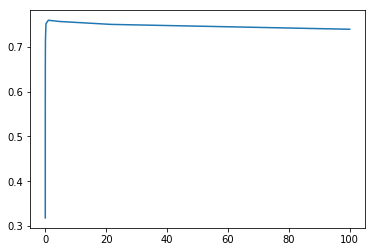

In [119]:
plt.plot(logit_c_values1, logit_mean_cv_scores1);

**Теперь то же самое, только значения параметра `C` перебирайте в диапазоне `np.linspace`(3, 7, 20). Опять нарисуем кривые валидации и определим максимальное значение доли правильных ответов на кросс-валидации.**

In [129]:
%%time
logit_c_values2 = np.linspace(3, 7, 20)

logit_grid_searcher2 = LogisticRegressionCV(Cs=logit_c_values2, cv=skf, multi_class='multinomial', n_jobs=-1, random_state=17)
logit_grid_searcher2.fit(X_train, y_train)

Wall time: 1min 9s


Средние значения доли правильных ответов на кросс-валидации по каждому из 10 параметров `C`.

In [130]:
logit_mean_cv_scores2 = list(logit_grid_searcher2.scores_.values())[0].mean(axis=0)
logit_mean_cv_scores2

array([ 0.75960708,  0.75706708,  0.75727142,  0.75727111,  0.75666147,
        0.7565601 ,  0.75615369,  0.7560524 ,  0.75554439,  0.75595111,
        0.75554548,  0.75493634,  0.75483484,  0.75473377,  0.75453067,
        0.75453086,  0.75463236,  0.75463236,  0.75402294,  0.75371788])

Выведем лучшее значение доли правильных ответов на кросс-валидации и соответствующее значение `C`.

In [135]:
best_logit_mean_cv_scores2 = max(logit_mean_cv_scores2)
best_Cs2 = logit_grid_searcher2.Cs_[np.argmax(logit_mean_cv_scores2)]

print('best_score2 =', best_logit_mean_cv_scores2)
print('best_Cs2 =', best_Cs2)

best_score2 = 0.759607084457
best_Cs2 = 3.0


Нарисуем график зависимости доли правильных ответов на кросс-валидации от `C`.

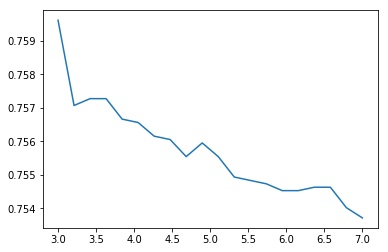

In [132]:
plt.plot(logit_c_values2, logit_mean_cv_scores2);

Выведем долю правильных ответов на выборке `(X_valid, y_valid)` для логистической регрессии с лучшим найденным значением `C`.

In [136]:
logit = LogisticRegression(C=best_Cs2, random_state=17, n_jobs=-1)
logit.fit(X_train, y_train)
logit_cv_acc = accuracy_score(y_valid, logit.predict(X_valid))
print(logit_cv_acc)

0.784309077981


In [137]:
logit = LogisticRegression(C=best_Cs2, random_state=17, n_jobs=-1)
accuracy_cv_train = cross_val_score(logit, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1).mean()
print(accuracy_cv_train)

0.761027744765


**4. Обучим линейный SVM (`LinearSVC`) с параметром `C`=1 и `random_state`=17 (для воспроизводимости). Посмотрим на долю правильных ответов на кросс-валидации (воспользуемся объектом `skf`, созданным ранее) и на выборке `(X_valid, y_valid)`.**

In [144]:
from sklearn.svm import LinearSVC

In [146]:
%%time
svm = LinearSVC(C=1, random_state=17)
accuracy_cv_train = cross_val_score(svm, X_train, y_train, scoring='accuracy', cv = skf).mean()
print(accuracy_cv_train)

0.752797672301
Wall time: 8.11 s


**С помощью `GridSearchCV` подберем параметр `C` для SVM сначала в широком диапазоне: 10 значений от 1e-4 до 1e4, используем `linspace` из NumPy. Нарисуем кривые валидации.**

In [147]:
%%time
svm_params1 = {'C': np.linspace(1e-4, 1e4, 10)}

svm_grid_searcher1 = GridSearchCV(svm, param_grid=svm_params1, scoring='accuracy', n_jobs=-1, cv=skf)
svm_grid_searcher1.fit(X_train, y_train)

Wall time: 1min 9s


Выведем лучшее значение доли правильных ответов на кросс-валидации и соответствующее значение `C`.

In [154]:
best_accuracy1 = svm_grid_searcher1.best_score_
best_C1 = svm_grid_searcher1.best_params_

print('best_accuracy1 =', best_accuracy1)
print('best_C1 =', best_C1)

best_accuracy1 = 0.68451534241
best_C1 = {'C': 3333.3334000000004}


Нарисуем график зависимости доли правильных ответов на кросс-валидации от `C`.

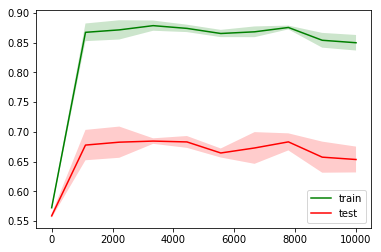

In [150]:
plot_validation_curves(svm_params1['C'], svm_grid_searcher1.cv_results_)

**Однако вспомним, что с параметром регуляризации по умолчанию (С=1) на кросс-валидации доля правильных ответов была выше. Это тот случай (не редкий), когда можно ошибиться и перебирать параметры не в том диапазоне (причина в том, что мы взяли равномерную сетку на большом интервале и упустили действительно хороший интервал значений `C`). Здесь намного осмысленней подбирать `C` в районе 1, к тому же так модель быстрее обучается, чем при больших `C`. **

**С помощью `GridSearchCV` подберем параметр `C` для SVM в диапазоне (1e-3, 1), 30 значений, воспользуемся `linspace` из NumPy. Нарисуем кривые валидации.**

In [151]:
%%time
svm_params2 = {'C': np.linspace(1e-3, 1, 30)}

svm_grid_searcher2 = GridSearchCV(svm, param_grid=svm_params2, scoring='accuracy', n_jobs=-1, cv=skf)
svm_grid_searcher2.fit(X_train, y_train)

Wall time: 1min 23s


Выведем лучшее значение доли правильных ответов на кросс-валидации и соответствующее значение `C`.

In [155]:
best_accuracy2 = svm_grid_searcher2.best_score_
best_C2 = svm_grid_searcher2.best_params_

print('best_accuracy2 =', best_accuracy2)
print('best_C2 =', best_C2)

best_accuracy2 = 0.764681975208
best_C2 = {'C': 0.10434482758620689}


Нарисуем график зависимости доли правильных ответов на кросс-валидации от С.

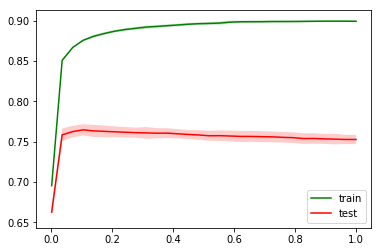

In [153]:
plot_validation_curves(svm_params2['C'], svm_grid_searcher2.cv_results_)

Выведем долю правильных ответов на выборке `(X_valid, y_valid)` для `LinearSVC` с лучшим найденным значением `C`.

In [167]:
svm_cv_acc = accuracy_score(y_valid, svm_grid_searcher2.best_estimator_.predict(X_valid))
svm_cv_acc

0.78075373311211183

## <center> 4.2. Выбор параметров – длины сессии и ширины окна

**Возьмем `LinearSVC`, показавший лучшее качество на кросс-валидации (см. выше), и проверим его работу еще на 8 выборках для 10 пользователей (с разными сочетаниями параметров *session_length* и *window_size*). Поскольку тут уже вычислений побольше, мы не будем каждый раз заново подбирать параметр регуляризации `C`.**

**Определим функцию `model_assessment`, ее документация описана ниже. Обратим внимание на все детали. Например, на то, что разбиение  выборки с `train_test_split` должно быть стратифицированным. Укажем, где надо, `random_state`.**

In [215]:
def model_assessment(estimator, path_to_X_pickle, path_to_y_pickle, cv, random_state=17, test_size=0.3):
    '''
    Estimates CV-accuracy for (1 - test_size) share of (X_sparse, y) 
    loaded from path_to_X_pickle and path_to_y_pickle and holdout accuracy for (test_size) share of (X_sparse, y).
    The split is made with stratified train_test_split with params random_state and test_size.
    
    :param estimator – Scikit-learn estimator (classifier or regressor)
    :param path_to_X_pickle – path to pickled sparse X (instances and their features)
    :param path_to_y_pickle – path to pickled y (responses)
    :param cv – cross-validation as in cross_val_score (use StratifiedKFold here)
    :param random_state –  for train_test_split
    :param test_size –  for train_test_split
    
    :returns mean CV-accuracy for (X_train, y_train) and accuracy for (X_valid, y_valid) where (X_train, y_train)
    and (X_valid, y_valid) are (1 - test_size) and (testsize) shares of (X_sparse, y).
    '''
    start_time = time()
    
    # Загрузим сериализованные ранее объекты X_sparse и y
    with open(path_to_X_pickle, 'rb') as X_sparse_pkl:
        X_sparse = pickle.load(X_sparse_pkl)
    with open(path_to_y_pickle, 'rb') as y_pkl:
        y = pickle.load(y_pkl)
    
    # Разобьем выборку на 2 части. Учтем, что разбиение выборки с train_test_split должно быть стратифицированным
    X_train, X_valid, y_train, y_valid = train_test_split(X_sparse, y, 
                                                          test_size=test_size, 
                                                          random_state=random_state, stratify=y)
    
    accuracy = accuracy_score(estimator.fit(X_train, y_train).predict(X_valid), y_valid)
    mean_CV_accuracy = cross_val_score(estimator, X_train, y_train, cv=cv, scoring='accuracy').mean()
    
    return mean_CV_accuracy, accuracy, str(int(time() - start_time) // 60) + ' m  ' + \
                                       str(round((time() - start_time) % 60, 1)) + ' s' 

**Применим функцию *model_assessment* для лучшего алгоритма из предыдущей части (а именно, `svm_grid_searcher2.best_estimator_`) и 9 выборок вида с разными сочетаниями параметров *session_length* и *window_size* для 10 пользователей. Выведем в цикле параметры *session_length* и *window_size*, а также результат вывода функции *model_assessment*. 
Удобно сделать так, чтобы *model_assessment* возвращала 3-им элементом время, за которое она выполнилась.**

Здесь для удобства стоит создать копии ранее созданных pickle-файлов X_sparse_10users.pkl, X_sparse_150users.pkl, y_10users.pkl и y_150users.pkl, добавив к их названиям s10_w10, что означает длину сессии 10 и ширину окна 10. 

In [178]:
!cp $PATH_TO_DATA/X_sparse_10users.pkl $PATH_TO_DATA/X_sparse_10users_s10_w10.pkl 
!cp $PATH_TO_DATA/X_sparse_150users.pkl $PATH_TO_DATA/X_sparse_150users_s10_w10.pkl 
!cp $PATH_TO_DATA/y_10users.pkl $PATH_TO_DATA/y_10users_s10_w10.pkl 
!cp $PATH_TO_DATA/y_150users.pkl $PATH_TO_DATA/y_150users_s10_w10.pkl 

In [205]:
%%time
estimator = svm_grid_searcher2.best_estimator_

print('Для 10 пользователей:\n')
for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
    if window_size <= session_length:
        path_to_X_pkl = os.path.join(PATH_TO_DATA, 'X_sparse_10users_s{}_w{}.pkl'.format(session_length, window_size))
        path_to_y_pkl = os.path.join(PATH_TO_DATA, 'y_10users_s{}_w{}.pkl'.format(session_length, window_size))
        print('session_length =', session_length, ' '*5, 'window_size =', window_size, '  ',
              model_assessment(estimator, path_to_X_pkl, path_to_y_pkl, skf))

Для 10 пользователей:

session_length = 15       window_size = 10    (0.82382149552781048, 0.84048352690210948, '6.7 s')
session_length = 10       window_size = 10    (0.76468532445509807, 0.78075373311211183, '3.8 s')
session_length = 15       window_size = 7    (0.84794037698440983, 0.85432221669155473, '9.2 s')
session_length = 10       window_size = 7    (0.79701614637346518, 0.80736684917869583, '5.1 s')
session_length = 7       window_size = 7    (0.75298911148303416, 0.76173884187821472, '3.2 s')
session_length = 15       window_size = 5    (0.86800137255434695, 0.87529634898055952, '12.5 s')
session_length = 10       window_size = 5    (0.81592472053180387, 0.82456140350877194, '7.1 s')
session_length = 7       window_size = 5    (0.77405867456322597, 0.78532479848269321, '4.4 s')
session_length = 5       window_size = 5    (0.72528306503988282, 0.73624940730203892, '2.9 s')
Wall time: 54.9 s


**Запишем доли правильных ответов для `LinearSVC` с настроенным параметром `C` и выборки `X_sparse_10users_s15_w5`. Укажем доли правильных ответов на кросс-валидации и на отложенной выборке, округлив каждое до 3 знаков после запятой.**

In [203]:
session_length, window_size = 15, 5

path_to_X_pkl = os.path.join(PATH_TO_DATA, 'X_sparse_10users_s{}_w{}.pkl'.format(session_length, window_size))
path_to_y_pkl = os.path.join(PATH_TO_DATA, 'y_10users_s{}_w{}.pkl'.format(session_length, window_size))

acc_cv, acc_val, time_ = model_assessment(estimator, path_to_X_pkl, path_to_y_pkl, skf)

print(time_)
print('{:.3f} {:.3f}'.format(acc_cv, acc_val, 3))

12.3 s
0.868 0.875


In [218]:
%%time
estimator = svm_grid_searcher2.best_estimator_

print('Для 150 пользователей:\n')
for window_size, session_length in [(5,5), (7,7), (10,10)]:
    path_to_X_pkl = os.path.join(PATH_TO_DATA, 'X_sparse_150users_s{}_w{}.pkl'.format(session_length, window_size))
    path_to_y_pkl = os.path.join(PATH_TO_DATA, 'y_150users_s{}_w{}.pkl'.format(session_length, window_size))
    print('session_length =', session_length, ' '*5, 'window_size =', window_size, '  ',
          model_assessment(estimator, path_to_X_pkl, path_to_y_pkl, skf))

Для 150 пользователей:

session_length = 5       window_size = 5    (0.40858659509908596, 0.42171606560568453, '9 m  21.6 s')
session_length = 7       window_size = 7    (0.43638649409423974, 0.45295840855673264, '8 m  11.7 s')
session_length = 10       window_size = 10    (0.46125889994279129, 0.48362769425388019, '8 m  5.6 s')
Wall time: 25min 38s


**ВЫВОД:**    
С **ростом** ширины окна качество классификации **растет**. При этом вычислительная сложность (время рассчета) значимо **не увеличивается**.     
**Максимальный** результат получился при **(session_length = 15,** **window_size = 5)**, он на **10%** **превышает** результат на сочетании **(10, 10)**, который, в свою очередь, среди проверенных сочетаний параметров (session_length, window_size) является **средним**.

## <center> 4.3. Идентификация  конкретного пользователя и кривые обучения

**Поскольку может разочаровать, что многоклассовая доля правильных ответов на выборке из 150 пользовалей невелика, порадуемся тому, что конкретного пользователя можно идентифицировать достаточно хорошо. **

**Загрузим сериализованные ранее объекты *X_sparse_150users* и *y_150users*, соответствующие обучающей выборке для 150 пользователей с параметрами (*session_length, window_size*) = (10,10). Так же точно разобьем их на 70% и 30%.**

In [220]:
with open(os.path.join(PATH_TO_DATA, 'X_sparse_150users.pkl'), 'rb') as X_sparse_150users_pkl:
     X_sparse_150users = pickle.load(X_sparse_150users_pkl)
with open(os.path.join(PATH_TO_DATA, 'y_150users.pkl'), 'rb') as y_150users_pkl:
    y_150users = pickle.load(y_150users_pkl)

In [221]:
X_train_150, X_valid_150, y_train_150, y_valid_150 = train_test_split(X_sparse_150users, 
                                                                      y_150users, test_size=0.3, 
                                                     random_state=17, stratify=y_150users)

**Обучим `LogisticRegressionCV` для одного значения параметра `C` (лучшего на кросс-валидации в 1 части). Теперь будем решать 150 задач "Один-против-Всех", поэтому укажем аргумент `multi_class`='ovr'. Как всегда, где возможно, указываем `n_jobs=-1` и `random_state`=17.**

In [235]:
%%time
logit_cv_150users = LogisticRegressionCV(Cs=[best_Cs2], multi_class='ovr', cv=skf, 
                                         scoring='accuracy', n_jobs=-1, random_state=17)
logit_cv_150users.fit(X_train_150, y_train_150)

Wall time: 13min 15s


**Посмотрим на средние доли правильных ответов на кросс-валидации в задаче идентификации каждого пользователя по отдельности.**

In [ ]:
cv_scores_by_user = {}
for user_id in logit_cv_150users.scores_:
    print('User {}, CV score: {}'.format(user_id, logit_cv_150users.scores_[user_id].mean()))
    cv_scores_by_user[user_id] = logit_cv_150users.scores_[user_id].mean(axis=0)

**Приведем здесь только несколько строк из результата этого кода, остальные - аналогичны:**   
User 780, CV score: 0.9964864855898773   
User 784, CV score: 0.9965802404005265   
User 785, CV score: 0.9969243550752823   
User 797, CV score: 0.9957150531207951   

**Результаты кажутся впечатляющими, но не забудем про дисбаланс классов. Высокую долю правильных ответов можно получить константным прогнозом. Посчитаем для каждого пользователя разницу между долей правильных ответов на кросс-валидации (только что посчитанную с помощью `LogisticRegressionCV`) и долей меток в *y_train_150*, отличных от ID 
 этого пользователя (именно такую долю правильных ответов можно получить, если классификатор всегда "говорит", что это не пользователь с номером $i$ в задаче классификации $i$-vs-All).**

In [259]:
class_distr = np.bincount(y_train_150.astype('int'))

acc_diff_vs_constant = {}
for user_id in np.unique(y_train_150):
    acc_diff_vs_constant[user_id] = cv_scores_by_user[user_id] - (1 - class_distr[user_id] / len(y_train_150))

**Запишем общее число и долю пользователей, для которых логистическая регрессия на кросс-валидации дает прогноз лучше константного, округлив до 3 знаков после запятой. **

In [260]:
num_better_than_default = (np.array(list(acc_diff_vs_constant.values())) > 0).sum()
num_better_than_default

124

In [265]:
print(round((num_better_than_default)  / len(acc_diff_vs_constant), 3))

0.807


**Дальше будем строить кривые обучения для конкретного пользователя, допустим, для 128-го. Составим новый бинарный вектор на основе *y_150users*, его значения будут 1 или 0 в зависимости от того, равен ли ID-шник пользователя 128.**

In [270]:
y_binary_128 = (y_150users == 128).astype(int)

In [272]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(val_train, val_test, train_sizes, 
                        xlabel='Training Set Size', ylabel='score'):
    def plot_with_err(x, data, **kwargs):
        mu, std = data.mean(1), data.std(1)
        lines = plt.plot(x, mu, '-', **kwargs)
        plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                         facecolor=lines[0].get_color(), alpha=0.2)
    plot_with_err(train_sizes, val_train, label='train')
    plot_with_err(train_sizes, val_test, label='valid')
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.legend(loc='lower right');

**Посчитаем доли правильных ответов на кросс-валидации в задаче классификации "user128-vs-All" в зависимости от размера выборки. Для деталей смотрим встроенную документацию для *learning_curve*.**

In [275]:
%%time
train_sizes = np.linspace(0.25, 1, 20)
estimator = svm_grid_searcher2.best_estimator_
n_train, val_train, val_test = learning_curve(estimator, X_sparse_150users, y_binary_128, 
                                              train_sizes=train_sizes, cv=skf, scoring='accuracy')

Wall time: 38.8 s


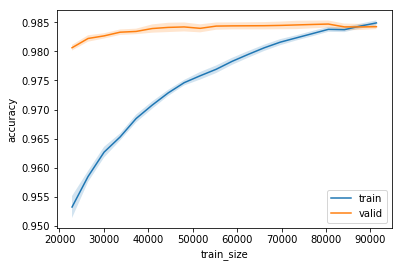

In [276]:
plot_learning_curve(val_train, val_test, n_train, 
                    xlabel='train_size', ylabel='accuracy')

**ВЫВОД:**   
По кривой обучения видно, что значение метрики на обучающей и отложенной выборки практически **сравнялись**. Это означает, что величина выборки **достаточная** и дальнейшее ее пополнение размеченными данными не приведет к улучшению результата.

## Что еще можно сделать
Что еще можно добавить по 4 части проекта:
- конечно, можно проверить еще кучу алгоритмов, например, Xgboost, но в такой задаче очень маловероятно, что что-то справится лучше линейных методов
- можно проверить качество алгоритма на данных, где сессии выделялись не по количеству посещенных сайтов, а по времени, например, 5, 7, 10 и 15 минут. Отметим также соответствующее [соревнование на **Kaggle**](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) 
- можно проверить, насколько хорошо можно решить задачу для 3000 пользователей (это, однако, потребует соответствующих ресурсов или времени)

В следующей части мы вспомним про линейные модели, обучаемые стохастическим градиентным спуском, и порадуемся тому, насколько быстрее они работают. Также сделаем первые (в этом проекте) посылки в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass.

# <center>Часть 5.  
# <center>Соревнование Kaggle "Catch Me If You Can"
## <center>Введение

В этой части мы вспомним про концепцию стохастического градиентного спуска и опробуем классификатор Scikit-learn SGDClassifier, который работает намного быстрее на больших выборках, чем алгоритмы, которые мы тестировали в 4 части. Также мы познакомимся с данными [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle по идентификации пользователей и сделаем в нем свои посылки. Попробуем добиться хорошего результата.

## <center> 5.1. Получение результата и подготовка первой посылки на Kaggle

**Считаем данные [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) в DataFrame train_df и test_df (обучающая и тестовая выборки).**

In [3]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_sessions.csv'),
                       index_col='session_id')
test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_sessions.csv'),
                      index_col='session_id')

In [4]:
train_df.head()

site1                time1  site2                time2    site3  \
session_id                                                                    
1             718  2014-02-20 10:02:45    NaN                  NaN      NaN   
2             890  2014-02-22 11:19:50  941.0  2014-02-22 11:19:50   3847.0   
3           14769  2013-12-16 16:40:17   39.0  2013-12-16 16:40:18  14768.0   
4             782  2014-03-28 10:52:12  782.0  2014-03-28 10:52:42    782.0   
5              22  2014-02-28 10:53:05  177.0  2014-02-28 10:55:22    175.0   

                          time3    site4                time4  site5  \
session_id                                                             
1                           NaN      NaN                  NaN    NaN   
2           2014-02-22 11:19:51    941.0  2014-02-22 11:19:51  942.0   
3           2013-12-16 16:40:19  14769.0  2013-12-16 16:40:19   37.0   
4           2014-03-28 10:53:12    782.0  2014-03-28 10:53:42  782.0   
5           2014-02-28 10:55:22    178.0  2014-02-28 10:55:23  177.0   

                          time5  ...                  time6    site7  \
session_id                       ...                                   
1                           NaN  ...                    NaN      NaN   
2           2014-02-22 11:19:51  ...    2014-02-22 11:19:51   3847.0   
3           2013-12-16 16:40:19  ...    2013-12-16 16:40:19  14768.0   
4           2014-03-28 10:54:12  ...    2014-03-28 10:54:42    782.0   
5           2014-02-28 10:55:23  ...    2014-02-28 10:55:59    175.0   

                          time7    site8                time8    site9  \
session_id                                                               
1                           NaN      NaN                  NaN      NaN   
2           2014-02-22 11:19:52   3846.0  2014-02-22 11:19:52   1516.0   
3           2013-12-16 16:40:20  14768.0  2013-12-16 16:40:21  14768.0   
4           2014-03-28 10:55:12    782.0  2014-03-28 10:55:42    782.0   
5           2014-02-28 10:55:59    177.0  2014-02-28 10:55:59    177.0   

                          time9   site10               time10 target  
session_id                                                            
1                           NaN      NaN                  NaN      0  
2           2014-02-22 11:20:15   1518.0  2014-02-22 11:20:16      0  
3           2013-12-16 16:40:22  14768.0  2013-12-16 16:40:24      0  
4           2014-03-28 10:56:12    782.0  2014-03-28 10:56:42      0  
5           2014-02-28 10:57:06    178.0  2014-02-28 10:57:11      0  

[5 rows x 21 columns]

**Объединим обучающую и тестовую выборки – это понадобится, чтоб вместе потом привести их к разреженному формату.**

In [5]:
train_test_df = pd.concat([train_df, test_df])

В обучающей выборке видим следующие признаки:
    - site1 – индекс первого посещенного сайта в сессии
    - time1 – время посещения первого сайта в сессии
    - ...
    - site10 – индекс 10-го посещенного сайта в сессии
    - time10 – время посещения 10-го сайта в сессии
    - user_id – ID пользователя
    
Сессии пользователей выделены таким образом, что они не могут быть длинее получаса или 10 сайтов. То есть сессия считается оконченной либо когда пользователь посетил 10 сайтов подряд, либо когда сессия заняла по времени более 30 минут. 

**Посмотрим на статистику признаков.**

Пропуски возникают там, где сессии короткие (менее 10 сайтов). Скажем, если человек 1 января 2015 года посетил *vk.com* в 20:01, потом *yandex.ru* в 20:29, затем *google.com* в 20:33, то первая его сессия будет состоять только из двух сайтов (site1 – ID сайта *vk.com*, time1 – 2015-01-01 20:01:00, site2 – ID сайта  *yandex.ru*, time2 – 2015-01-01 20:29:00, остальные признаки – NaN), а начиная с *google.com* пойдет новая сессия, потому что уже прошло более 30 минут с момента посещения *vk.com*.

**В обучающей выборке – 2297 сессий одного пользователя (Alice) и 251264 сессий – других пользователей, не Элис. Дисбаланс классов очень сильный, и смотреть на долю верных ответов (accuracy) непоказательно.**

In [9]:
train_df['target'].value_counts()

0    251264
1      2297
Name: target, dtype: int64

**Пока для прогноза будем использовать только индексы посещенных сайтов. Индексы нумеровались с 1, так что заменим пропуски на нули.**

In [10]:
train_test_df_sites = train_test_df[['site%d' % i for i in range(1, 11)]].fillna(0).astype(int)

In [11]:
train_test_df_sites.head(10)

site1  site2  site3  site4  site5  site6  site7  site8  site9  \
session_id                                                                  
1             718      0      0      0      0      0      0      0      0   
2             890    941   3847    941    942   3846   3847   3846   1516   
3           14769     39  14768  14769     37     39  14768  14768  14768   
4             782    782    782    782    782    782    782    782    782   
5              22    177    175    178    177    178    175    177    177   
6             570     21    570     21     21      0      0      0      0   
7             803     23   5956  17513     37     21    803  17514  17514   
8              22     21     29   5041  14422     23     21   5041  14421   
9             668    940    942    941    941    942    940     23     21   
10           3700    229    570     21    229     21     21     21   2336   

            site10  
session_id          
1                0  
2             1518  
3            14768  
4              782  
5              178  
6                0  
7            17514  
8            14421  
9               22  
10            2044

**Создадим разреженные матрицы *X_train_sparse* и *X_test_sparse* аналогично тому, как мы это делали ранее. Используем объединенную матрицу *train_test_df_sites*, потом разделим обратно на обучающую и тестовую части.**

Обратим внимание на то, что в  сессиях меньше 10 сайтов  у нас остались нули, так что первый признак (сколько раз попался 0) по смыслу отличен от остальных (сколько раз попался сайт с индексом $i$). Поэтому первый столбец разреженной матрицы надо будет удалить.

**Выделим в отдельный вектор *y* ответы на обучающей выборке.**

In [12]:
train_test_sparse = csr_matrix((np.ones(train_test_df_sites.values.size), 
                                train_test_df_sites.values.ravel(), 
                                np.arange(train_test_df_sites.values.shape[0] + 1) * 
                                train_test_df_sites.values.shape[1]), dtype=int)[:, 1:]

X_train_sparse = train_test_sparse[:train_df.shape[0]]
X_test_sparse = train_test_sparse[train_df.shape[0]:]
y = train_df['target'].values

**Разобьем обучающую выборку на 2 части в пропорции 7/3, причем не перемешивая. Исходные данные упорядочены по времени, тестовая выборка по времени четко отделена от обучающей, это же соблюдем и здесь.**

In [15]:
train_share = int(.7 * X_train_sparse.shape[0])
X_train, y_train = X_train_sparse[:train_share, :], y[:train_share]
X_valid, y_valid  = X_train_sparse[train_share:, :], y[train_share:]

**Создадим объект `sklearn.linear_model.SGDClassifier` с логистической функцией потерь и параметром *random_state*=17. Остальные параметры оставим по умолчанию, разве что *n_jobs*=-1 никогда не помешает. Обучим  модель на выборке `(X_train, y_train)`.**

In [16]:
sgd_logit = SGDClassifier(loss='log', n_jobs=-1, random_state=17)
sgd_logit.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=17, shuffle=True,
       tol=None, verbose=0, warm_start=False)

**Сделаем прогноз в виде предсказанных вероятностей того, что это сессия Элис, на отложенной выборке *(X_valid, y_valid)*.**

In [17]:
logit_valid_pred_proba = sgd_logit.predict_proba(X_valid)

**Посмотрим на ROC AUC логистической регрессии, обученной с помощью стохастического градиентного спуска, на отложенной выборке, округлив до 3 знаков после разделителя.**

In [18]:
print('ROC AUC =', round(roc_auc_score(y_valid, logit_valid_pred_proba[:, 1]), 3))

ROC AUC = 0.934


**Сделаем прогноз в виде предсказанных вероятностей отнесения к классу 1 для тестовой выборки с помощью той же *sgd_logit*, обученной уже на всей обучающей выборке (а не на 70%).**

In [19]:
%%time
sgd_logit = SGDClassifier(loss='log', n_jobs=-1, random_state=17)
logit_test_pred_proba = sgd_logit.fit(X_train_sparse, y).predict_proba(X_test_sparse)[:, 1]

Wall time: 676 ms


**Запишем ответы в файл и сделайте посылку на Kaggle. Название команды на Kaggle в этом [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/leaderboard/public) –**    
### [YDF & MIPT] Dmitry Shereshevskiy   

In [20]:
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="session_id"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [21]:
write_to_submission_file(logit_test_pred_proba, os.path.join(PATH_TO_DATA, '[YDF & MIPT]_Coursera_sgd_logit.csv'))

**Результат, который мы только что получили, соответствует бейзлайну "SGDCLassifer" на лидерборде. Поставим себе задачу - максимально улучшить его.**

## Пути улучшения
Что можно попробовать:
 - Использовать ранее построенные признаки для улучшения модели (проверить их можно на меньшей выборке по 150 пользователям, отделив одного из пользователей от остальных – это быстрее)
 - Настроить параметры моделей (например, коэффициенты регуляризации)
 - Если позволят мощности (или хватит терпения), можно попробовать смешивание (блендинг) ответов бустинга и линейной модели. [Вот](http://mlwave.com/kaggle-ensembling-guide/) один из самых известных тьюториалов по смешиванию ответов алгоритмов, также хороша [статья](https://alexanderdyakonov.wordpress.com/2017/03/10/cтекинг-stacking-и-блендинг-blending) Александра Дьяконова
 - Обратим внимание, что в соревновании также даны исходные данные о посещенных веб-страницах Элис и остальными 1557 пользователями (*train.zip*). По этим данным можно сформировать свою обучающую выборку. 

В 6 части мы разберем пакет **Vowpal Wabbit** и попробуем его в деле, на данных соревнования.

## <center>5.2. Работа по улучшению результата на Kaggle
### <center>5.2.1. Линейный классификатор

Для **улучшения результата в соревновании на Kaggle**, да и в общем для **улучшения качества модели** идентификации пользователя, которую мы разрабатываем в этом проекте, сделаем следующие дополнения к уже имеющейся модели.

Сформируем новые **дополнительные признаки** из исходных даннных. Для этого модифицируем функцию, которая формирует итоговые признаки, загружаемые непосредственно в классификатор. Исходя из опыта и предварительного исследования, будем придерживаться следующего при формировании признаков:
- все признаки, которые формируются из временных меток, соответствущих времени захода на сайт - **категориальные** (несмотря на то, что по форме выглядят как вещественные)
- исходя из этого считаем **категориальным признаком**:
    - час начала сессии
    - день недели начала сессии
    - число уникальных сайтов в сессии
    - было ли начало сессии в уикэнд
    - время суток (4 значения)
    
- длительность сессии разобьем на 7 периодов (по длительности) и также сделаем категориальным
- все получившиеся категориальные признаки закодируем с применением техники **`one hot encoding`**
- списки сайтов-сессий будем учитывать по методике **`мешка слов`** и закодируем их с использованием методологии **Tf-idf**-кодирования.

В соответствие с этими положениями сделаем **новую функцию** (модифицированную из ранее сформированных)) для обработки данных и **формирования признаков**. В соответствие с данными соревнования, функция **принимает на вход**:
- списки сайтов, разбитые по **сессиям из 10 сайтов** (напомним, ранее мы уже делали функцию, которая формирует такие списки из исходных "сырых" данных) - **train_df**. Причем на вход может приниматься как только **обучающие данные с разметкой**, так и обучающие данные **вместе с тестовыми** - **test_df**. 

**На выходе**, в зависимости от входных данных, мы получаем:
- матрицу признаков **обучающей выборки** в формате `sparse`, которая содержит сайты в виде закодированного через **TF-idf** **мешка слов** и вектор **целевого признака** - **X_train_sparse** и **y**.
- или в дополнение к этому еще и соответствующую матрицу признаков **тестовой выборки** (естественно, уже без разметки) - **X_test_sparse**

**Далее, теперь будем учитывать обстоятельство, что большинство дополнительных фич у нас по сути КАТЕГОРИАЛЬНЫЕ, и для них нужно делать определенную предобработку**.
Мы уже обсуждали это ранее. Как мы отмечали, для корректности категориальные признаки надо **бинаризовать**. Более правильно это сделать с применением техники **'one hot coding'** или  **Tf-idf**-кодирования. Сделаем это ниже, а пока попробуем **упрощенный вариант** - просто поделим пространства значений признаков на 2 части и примем значение признака равно **1**, если он принадлежит к одной из половин, и **0**, если он к ней не принадлежит.

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
def feature_engineering_df_OHE_Tfidf(train_df, test_df=None, features=None):
    '''
    features = ['#unique_sites', 'session_timespan', 'start_hour', 'day_of_week', 'time_of_day', 'weekend']
    '''
    if features is None:
        features = ['#unique_sites', 'session_timespan', 'start_hour', 'day_of_week', 'time_of_day', 'weekend']
    
    if test_df is None:
        df = train_df
    else:
        df = pd.concat([train_df, test_df])
    
    # выделим отдельно сайты
    df_sites = df[['site%d' % i for i in range(1, 11)]] # не забыть заполнить нули
    
    # подготовим временнЫе метки
    df[['time%d' % i for i in range(1, 11)]] = df[['time%d' % i for i in range(1, 11)]].applymap(pd.to_datetime)
    timestamp_df = df[['time%d' % i for i in range(1, 11)]].applymap(lambda x: pd.datetime.timestamp(x) 
                                                                  if type(x) == pd._libs.tslib.Timestamp else np.nan)
    # добавляем признаки
    if '#unique_sites' in features:
        df['#unique_sites'] = df[['site' + str(i) for i in range(1, 11)]].nunique(axis=1, dropna=True)
    if 'session_timespan' in features:
        df['session_timespan'] = timestamp_df.max(axis=1, skipna=True) - timestamp_df.min(axis=1, skipna=True)
        df['session_timespan'] = df['session_timespan'].apply(lambda x: x // 30 if x < 210 else 7)
#         df['session_timespan'] = df['session_timespan'].apply(lambda x: int(np.log2(x)) if x > 1 else 0)
    if 'start_hour' in features:    
        df['start_hour'] = df['time1'].apply(lambda x: x.hour)
    if 'day_of_week' in features:    
        df['day_of_week'] = df['time1'].apply(lambda x: x.weekday())
    if 'time_of_day' in features:    
        # время суток (06-12 - утро(1), 12-19 - день(2), 19-24 - вечер(3), 00-06 - ночь(4))
        df['time_of_day'] = df['time1'].apply(lambda x:  1 if x.hour >  6 and x.hour <= 12 else 
                                                                     2 if x.hour > 12 and x.hour <= 19 else
                                                                     3 if x.hour > 19 and x.hour <= 24 else 
                                                                     4)
    if 'weekend' in features:
        # индикатор уикэнда в день начала сессии
        df['weekend'] = df['time1'].apply(lambda x: 1 if x.weekday() in [5, 6] else 0)
        
#     X_new_sparse = csr_matrix(df[features].values)
    encoder = OneHotEncoder()
    X_new_sparse = encoder.fit_transform(df[features].values)
    
    df_sites = df_sites.fillna(0).astype(int)
#     train_sparse = csr_matrix((np.ones(df_sites.values.size), 
#                                 df_sites.values.ravel(), 
#                                 np.arange(df_sites.values.shape[0] + 1) * 
#                                 df_sites.values.shape[1]), dtype=int)[:, 1:]

    # готовим блок с сайтами для кодирования посредством TfidfVectorizer()
    df_sites = df_sites.astype(str)
    sites_text = df_sites['site1']
    for i in range(2, 11):
        sites_text += ' ' + df_sites['site{}'.format(i)]
    # кодируем подготовленный блок с сайтами
    Tfidf_Vectorizer = TfidfVectorizer()    
    train_sparse = Tfidf_Vectorizer.fit_transform(sites_text.values)
   
    X_sparse = sparse.hstack([train_sparse, X_new_sparse]).tocsr()
    X_train_sparse = X_sparse[:train_df.shape[0]]
    X_test_sparse = X_sparse[train_df.shape[0]:]
    
    y_train = df['target'].values[:train_df.shape[0]]
    
    return (X_train_sparse, y_train) if test_df is None else (X_train_sparse, y_train, X_test_sparse)

Для автоматизации и оптимизации процесса исследования признаков также создадим еше одну **вспомогательную функцию:**
- на вход функция принимает классификатор, обучающую выборку в виде **матрицы признаков** и вектора **целевой функции**, а на выходе дает метрику **roc_auc**, рассчитанную на **кросс-валидации**.

In [64]:
def CV_score(estimator, X_train_sparse, y, cv=None, random_state=17, test_size=0.3):
    '''
    обучение и расчет метрики на отложенной выборке
    '''
    mean_CV_score = cross_val_score(estimator, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
 
    return mean_CV_score

Применим сделанные функции для получения улучшенных признаков и рассчета предварительной метрики **roc_auc** на кросс-валидации. Учтем следующее:    
- сразу сделаем **балансировку классов**, поскольку, как мы видели ранее, классы в выборке силно несбалансированы, и предварительный анализ показал, что в данной выборке балансировка классов **улучшает результат**
- отметим, что подбор параметра **alpha** в SGDClassifier при предварительном анализе не привел к улучшению результата, поэтому оставим его значение по-умолчанию.

In [388]:
%%time
X_train_sparse_ohe_tfidf, y_train_ohe, X_test_sparse_ohe_tfidf = feature_engineering_df_OHE_Tfidf(train_df, test_df)
estimator = SGDClassifier(loss='log', n_jobs=-1, class_weight='balanced', random_state=17)
auc = CV_score(estimator, X_train_sparse_ohe_tfidf, y_train_ohe, cv=skf)
print(auc)

0.97748485306
Wall time: 3min 31s


Предварительный результат довольно приличный. Попробуем на **Kaggle**:

In [389]:
%%time
estimator = SGDClassifier(loss='log', n_jobs=-1, class_weight='balanced', random_state=17)
test_pred_proba = estimator.fit(X_train_sparse_ohe_tfidf, y_train_ohe).predict_proba(X_test_sparse_ohe_tfidf)[:, 1]
    
write_to_submission_file(test_pred_proba, os.path.join(PATH_TO_DATA, '[YDF & MIPT]_Coursera_sgd_allfeatures_OHE_bal_tfidf.csv'))

Wall time: 1.65 s


**Kaggle: 0.94773**   
Отлично! Результат на Kaggle, хоть и ниже предварительного, то тоже довольно **высокий**. 

### <center> 5.2.2. Бустинг

**Рассмотрим возможность применить CatBoost и  XGBoost**.   

Приведем сразу **РЕЗЮМЕ:**   
- **CatBoost** - хороший пакет, умеет продвинуто работать с категориальными признаками. Но, к сожалению, **не умеет работать с `sparse`-форматом**, а без этого с нашим набором данных не справиться, даже не удалось попробовать.
- **XGBoost** - другое дело, он со **`sparse`-форматом работает** без проблем. Но результат получается существенно **ниже**, чем у **SGDClisifier**. Это было **ожидаемо**, потому что с такого рода задачами линейные методы справляются, как правило, лучше деревьев.

Перейдем сразу к **смешиванию** алгоритмов.

### <center> 5.2.3. Cмешивание алгоритмов
Будем делать это по схеме **блендинга**, которая представляет из себя разновидность **стекинга**, описаную в <a href='https://alexanderdyakonov.wordpress.com/2017/03/10/c%D1%82%D0%B5%D0%BA%D0%B8%D0%BD%D0%B3-stacking-%D0%B8-%D0%B1%D0%BB%D0%B5%D0%BD%D0%B4%D0%B8%D0%BD%D0%B3-blending/'>статье</a> на сайте **Александра Дьяконова**.   
   
А именно:  
- делим обучающую выборку на две части
- на первой настраиваем два алгоритма и делаем предсказания на второй
- получаем два метапризнака
- таким же образом получаем два метапризнака на тестовой выборке
- далее, на полученных метапризнаках из второй части обучающей выборки настраиваем линейный классификатор и делаем предсказания на тестовых метапризнаках

In [22]:
import xgboost as xgb

Формируем признаки для **обучающей** и **тестовой** выборки с использованием подготовленной ранее функии:

In [19]:
%%time
X_train_sparse_ohe_tfidf, y_train_ohe, X_test_sparse_ohe_tfidf = feature_engineering_df_OHE_Tfidf(train_df, test_df)

Wall time: 7min


Обучающую выборку **делим пополам**: одна половина будет использоваться для формирования **метапризнаков**, на второй половине метапризнаки будут обучаться.

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_sparse_ohe_tfidf, y_train_ohe, 
                                                      test_size=0.5, 
                                                      random_state=17, stratify=y_train_ohe)

Для компактности соберем все в **одну ячейку** и организуем **измерение времени** отдельных этапов.

Предварительный анализ показал, что небольшая глубина деревьев в бустинге дает результат лучше. Это можно объяснить тем, что  для градиентного бустинга (в отличие от случайного леса) свойственно **переобучение**.  

Поэтому сделаем **максимальную глубину** деревьев в **xgboost** небольшой. Не забудем про **балансировку** в линейном классификаторе.

In [67]:
import datetime

In [70]:
start_time = datetime.datetime.now() # фиксируем время для измерения времени этапа

# делаем первый метапризнак на линейном алгоритме
sgd_logit = SGDClassifier(loss='log', n_jobs=-1, class_weight='balanced', random_state=17)
sgd_pred_proba = sgd_logit.fit(X_train, y_train).predict_proba(X_valid)[:, 1]
print('Time for sgd_pred_proba:', datetime.datetime.now() - start_time) # время этапа

# делаем второй метапризнак нв xgboost
start_time = datetime.datetime.now() # фиксируем время для измерения времени этапа
# инициализируем параметры
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'learning_rate': 0.5,
    'silent': 1.0,
    'n_estimators': 170
}
xgb_classifier = xgb.XGBClassifier(n_jobs=-1, random_state=17, **params)
xgb_pred_proba = xgb_classifier.fit(X_train, y_train).predict_proba(X_valid)[:, 1]
print('Time for xgb_pred_proba:', datetime.datetime.now() - start_time) # время этапа

# соединяем вместе два сформированных метапризнака для обучающей выборки
X_metafeature = np.hstack([sgd_pred_proba.reshape((-1, 1)), xgb_pred_proba.reshape((-1, 1))])

# вычисляем метапризнаки на тестовой выборке
start_time = datetime.datetime.now() # фиксируем время для измерения времени этапа
X_metafeature_test = np.hstack([sgd_logit.fit(X_train_sparse_ohe_tfidf, 
                                              y_train_ohe).predict_proba(X_test_sparse_ohe_tfidf)[:, 1].reshape((-1, 1)), 
                                xgb_classifier.fit(X_train_sparse_ohe_tfidf, 
                                                   y_train_ohe).predict_proba(X_test_sparse_ohe_tfidf)[:, 1].reshape((-1, 1))])
print('Time for X_metafeature_test:', datetime.datetime.now() - start_time) # время этапа

# обучаем алгоритм на метапризнаках обучающей выборки
start_time = datetime.datetime.now() # фиксируем время для измерения времени этапа
meta_sgd_logit = SGDClassifier(loss='log', n_jobs=-1, class_weight='balanced', random_state=17)

# делаем предсказание на метапризнаках тестовой выборки
test_pred_proba = meta_sgd_logit.fit(X_metafeature, y_valid).predict_proba(X_metafeature_test)[:, 1]
    
# формируем посылку на Kaggle
write_to_submission_file(test_pred_proba, os.path.join(PATH_TO_DATA, 
                                                       '[YDF & MIPT]_Coursera_allfeatures_OHE_bal_tfidf_meta2.csv'))
print('Time for write_to_submission_file:', datetime.datetime.now() - start_time) # время этапа

Time for sgd_pred_proba: 0:00:00.343441
Time for xgb_pred_proba: 0:00:25.080256
Time for X_metafeature_test: 0:00:43.124767
Time for write_to_submission_file: 0:00:00.929278


**Kaggle: 0.94739**    
Неплохо, как мы и ожидали, результат **вырос** при **уменьшении глубины** деревьев, но все же по-прежнему немного **уступает** самому лучшему результату, полученному выше на **линейном** классификаторе **SGDCclassifier**.   
Тем не менее опыт интересный.    
Как известно, **xgboost** любит хорошую настройку. Возможно, при более тщательном подборе гиперпараметров в **xgboost**, например, с использованием библиотеки **hyperopt**, мы смогли бы добиться более высокого результата.

**РЕЗЮМЕ:**   
Итак, финальный результат этой этой части проекта - **результат в [соревновании на Kaggle](https://www.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/leaderboard): 0.94773**.   
На момент его получени это - **63-я** позиция на **Public Leaderboard**, команда в соревновании - **[YDF & MIPT] Dmitry Shereshevskiy**.   

По результатам работы видно, что:
- корректная **предобработка категориальных признаков** дает существенный прирост результата предсказания, и чем таких признаков **больше** - тем лучше
- балансировка классов при их дисбалансе - **важна**
- в этой задаче **линейные методы** показали результат лучше, чем деревья
- можно **смешивать** разные алгоритмы и это тоже дает хороший результат

# <center>Часть 6.  Vowpal Wabbit
## <center>Введение
В этой части мы применим популярную библиотеку **Vowpal Wabbit** и попробуем ее на данных соревнования. Перед этим поработаем с  [данными](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html) Scikit-learn по новостям, сначала в режиме бинарной классификации, затем – в многоклассовом режиме. Затем будем классифицировать рецензии к фильмам с сайта IMDB. Наконец, применим Vowpal Wabbit к данным по веб-сессиям. Vowpal Wabbit - отличная библиотека!
<img src='http://www.i.baraholka.com.ru/files/1/2/1273150.jpg'>

**План 6 части:**
- 6.1. Статья по Vowpal Wabbit
- 6.2. Vowpal Wabbit в соревновании
 - Введение
 - 2.1. Функция для подготовки признаков из "сырых" данных
 - 2.2. Валидация по отложенной выборке
 - 2.3. Подбор гиперпараметров

## <center>6.1. Статья про Vowpal Wabbit
Краткая обзорная статья по Vowpal Wabbit на Хабре из серии открытого курса OpenDataScience по машинному обучению [здесь](https://habrahabr.ru/company/ods/blog/326418/). Можно скачать [ноутбук](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_russian/topic08_sgd_hashing_vowpal_wabbit/topic8_sgd_hashing_vowpal_wabbit.ipynb), прилагаемый к статье, и попробовать на практике разобраться с Vowpal Wabbit.

## <center> 6.2. Vowpal Wabbit в соревновании

### Загружаем данные

Применим **Vowpal Wabbit** для получения результата в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2), в котором мы участвовали в 5 части Проекта. Сравним полученный здесь результат с работой других классификаторов, с которыми мы работали в 5 части.

**Еще раз считаем данные [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) в DataFrame train_df и test_df (обучающая и тестовая выборки).**

In [6]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_sessions.csv'),
                       index_col='session_id')
test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_sessions.csv'),
                      index_col='session_id')

In [7]:
train_df.head()

site1                time1  site2                time2    site3  \
session_id                                                                    
1             718  2014-02-20 10:02:45    NaN                  NaN      NaN   
2             890  2014-02-22 11:19:50  941.0  2014-02-22 11:19:50   3847.0   
3           14769  2013-12-16 16:40:17   39.0  2013-12-16 16:40:18  14768.0   
4             782  2014-03-28 10:52:12  782.0  2014-03-28 10:52:42    782.0   
5              22  2014-02-28 10:53:05  177.0  2014-02-28 10:55:22    175.0   

                          time3    site4                time4  site5  \
session_id                                                             
1                           NaN      NaN                  NaN    NaN   
2           2014-02-22 11:19:51    941.0  2014-02-22 11:19:51  942.0   
3           2013-12-16 16:40:19  14769.0  2013-12-16 16:40:19   37.0   
4           2014-03-28 10:53:12    782.0  2014-03-28 10:53:42  782.0   
5           2014-02-28 10:55:22    178.0  2014-02-28 10:55:23  177.0   

                          time5  ...                  time6    site7  \
session_id                       ...                                   
1                           NaN  ...                    NaN      NaN   
2           2014-02-22 11:19:51  ...    2014-02-22 11:19:51   3847.0   
3           2013-12-16 16:40:19  ...    2013-12-16 16:40:19  14768.0   
4           2014-03-28 10:54:12  ...    2014-03-28 10:54:42    782.0   
5           2014-02-28 10:55:23  ...    2014-02-28 10:55:59    175.0   

                          time7    site8                time8    site9  \
session_id                                                               
1                           NaN      NaN                  NaN      NaN   
2           2014-02-22 11:19:52   3846.0  2014-02-22 11:19:52   1516.0   
3           2013-12-16 16:40:20  14768.0  2013-12-16 16:40:21  14768.0   
4           2014-03-28 10:55:12    782.0  2014-03-28 10:55:42    782.0   
5           2014-02-28 10:55:59    177.0  2014-02-28 10:55:59    177.0   

                          time9   site10               time10 target  
session_id                                                            
1                           NaN      NaN                  NaN      0  
2           2014-02-22 11:20:15   1518.0  2014-02-22 11:20:16      0  
3           2013-12-16 16:40:22  14768.0  2013-12-16 16:40:24      0  
4           2014-03-28 10:56:12    782.0  2014-03-28 10:56:42      0  
5           2014-02-28 10:57:06    178.0  2014-02-28 10:57:11      0  

[5 rows x 21 columns]

Отметим, что для работы с Vowpal Wabbit благодаря **хешированию** объединять обучающую и тестовую выборки нам нет необходимости.

### <center> 6.2.1. Функция для подготовки признаков из "сырых" данных

Сделаем функцию, формирующую из загруженных выше "сырых" данных признаки, которые мы впоследствии преобразуем к **формату для Vowpal Wabbit**.    
За основу возьмем уже протестированную в 5 части функцию. 

На вход она будет принимать "сырой" датафрейм с данными, а на выходе должен быть датафрейм с признаками и целевой вектор `y`, адапрированный по Vowpal Wabbit, то есть принимающий зачения [-1, 1]. Пропуски заменим на 0.

In [9]:
def feature_engineering_df_vw(train_df, test=False, features=None):
    '''
    features = ['#unique_sites', 'session_timespan', 'start_hour', 'day_of_week', 'time_of_day', 'weekend']
    '''
    if features is None:
        features = ['#unique_sites', 'session_timespan', 'start_hour', 'day_of_week', 'time_of_day', 'weekend']
    
    df = train_df
    if test:
        df['target'] = 1
    else:
        df['target'] = df['target'].map({1:1, 0:-1})
    
    
    # подготовим временнЫе метки
    df[['time%d' % i for i in range(1, 11)]] = df[['time%d' % i for i in range(1, 11)]].applymap(pd.to_datetime)
    timestamp_df = df[['time%d' % i for i in range(1, 11)]].applymap(lambda x: pd.datetime.timestamp(x) 
                                                                  if type(x) == pd._libs.tslib.Timestamp else np.nan)
    # добавляем признаки
    if '#unique_sites' in features:
        df['#unique_sites'] = df[['site' + str(i) for i in range(1, 11)]].nunique(axis=1, dropna=True)
    if 'session_timespan' in features:
        df['session_timespan'] = timestamp_df.max(axis=1, skipna=True) - timestamp_df.min(axis=1, skipna=True)
        df['session_timespan'] = df['session_timespan'].apply(lambda x: int(x // 30) if x < 210 else 7)
    if 'start_hour' in features:    
        df['start_hour'] = df['time1'].apply(lambda x: x.hour)
    if 'day_of_week' in features:    
        df['day_of_week'] = df['time1'].apply(lambda x: x.weekday())
    if 'time_of_day' in features:    
        # время суток (06-12 - утро(1), 12-19 - день(2), 19-24 - вечер(3), 00-06 - ночь(4))
        df['time_of_day'] = df['time1'].apply(lambda x:  1 if x.hour >  6 and x.hour <= 12 else 
                                                                     2 if x.hour > 12 and x.hour <= 19 else
                                                                     3 if x.hour > 19 and x.hour <= 24 else 
                                                                     4)
    if 'weekend' in features:
        # индикатор уикэнда в день начала сессии
        df['weekend'] = df['time1'].apply(lambda x: 1 if x.weekday() in [5, 6] else 0)
        
    col = ['site%d' % i for i in range(1, 11)] + features
    
    return (df[col].fillna(0).astype(int), df['target'].values.astype(int)) if not test else df[col].fillna(0).astype(int)

Применим функцию к обучающей и тестовой выборкам.

In [13]:
%%time
train_for_vw, y_for_vw = feature_engineering_df_vw(train_df)

Wall time: 4min 47s


In [14]:
%%time
test_for_vw = feature_engineering_df_vw(test_df, test=True)

Wall time: 1min 34s


In [15]:
train_for_vw.head()

site1  site2  site3  site4  site5  site6  site7  site8  site9  \
session_id                                                                  
1             718      0      0      0      0      0      0      0      0   
2             890    941   3847    941    942   3846   3847   3846   1516   
3           14769     39  14768  14769     37     39  14768  14768  14768   
4             782    782    782    782    782    782    782    782    782   
5              22    177    175    178    177    178    175    177    177   

            site10  #unique_sites  session_timespan  start_hour  day_of_week  \
session_id                                                                     
1                0              1                 0          10            3   
2             1518              7                 0          11            5   
3            14768              4                 0          16            0   
4              782              1                 7          10            4   
5              178              4                 7          10            4   

            time_of_day  weekend  
session_id                        
1                     1        0  
2                     1        1  
3                     2        0  
4                     1        0  
5                     1        0

Реализуем функцию, **`dataframe_to_vw`**, переводящую обучающую или тестовую выборку в формат **Vowpal Wabbit.**

Вход:
 - df – датафрейм `DataFrame` (обучающая выборка)
 - y (необяз.) - вектор ответов (`NumPy`). Необязателен, поскольку тестовую матрицу будем обрабатывать этой же функцией
 - out_file – путь к файлу .vw, в который будет произведена запись
 
Детали:
- надо пройтись по всем строкам датафрейма `df` и записать через пробел все значения, предварительно добавив вперед нужную метку класса из вектора `y` и знак-разделитель `|`
- в тестовой выборке на месте меток целевого класса можно писать произвольные, допустим, 1

In [21]:
def dataframe_to_vw(df, y=None, out_file=os.path.join(PATH_TO_DATA,'tmp.vw')):
    df = df.astype(str)
    sites = ['site%d' % i for i in range(1, 11)]
    if y is None:
        y = ['1'] * df.shape[0]
    with open(out_file, 'w') as vw_data:
        for (_, row), target in zip(df.iterrows(), y):
            sample = str(target) + \
                    ' |a_sites ' + ' '.join([row[site] for site in sites if row[site] != '0']) + \
                    ''.join([' |' + col + ' ' + row[col] for col in row.index if col not in sites]) + \
                    '\n'
            vw_data.write(sample)
    pass

### <center> 6.2.2. Валидация по отложенной выборке

Выделим обучающую (70%) и отложенную (30%) части исходной обучающей выборки. Данные не перемешиваем, учитываем, что сессии отсортированы по времени.

In [19]:
train_share = int(.7 * train_for_vw.shape[0])
train_for_vw_part = train_for_vw.iloc[:train_share, :]
valid_for_vw = train_for_vw.iloc[train_share:, :]

In [20]:
y_train_part_for_vw = y_for_vw[:train_share]
y_valid_for_vw = y_for_vw[train_share:]

Сохраним вектор целевого признака для **валидации**, это может потребоваться в дальнейшем при подборе параметров.

In [22]:
np.save(os.path.join(PATH_TO_DATA,'vw_y_valid_for_vw.npy'), y_valid_for_vw)

#### Применим написанную функцию к части обучащей выборки (train_df_part, y_train_part_for_vw), к отложенной выборке (valid_df, y_valid_for_vw), ко всей обучающей выборке и ко всей тестовой выборке - всего 4 вызова.

In [43]:
%%time
dataframe_to_vw(train_for_vw_part, y_train_part_for_vw, out_file=os.path.join(PATH_TO_DATA,'vw_train_part.vw'))
dataframe_to_vw(valid_for_vw, y_valid_for_vw, out_file=os.path.join(PATH_TO_DATA,'vw_valid_part.vw'))
dataframe_to_vw(train_for_vw, y_for_vw, out_file=os.path.join(PATH_TO_DATA,'vw_train.vw'))
dataframe_to_vw(test_for_vw, out_file=os.path.join(PATH_TO_DATA,'vw_test.vw'))

Wall time: 5min 4s


Проверим:

In [44]:
!head -3 $PATH_TO_DATA/vw_valid_part.vw

-1 |a_sites 3000 32 33 35 3000 5302 23 21 5302 21 |#unique_sites 7 |session_timespan 3 |start_hour 13 |day_of_week 2 |time_of_day 2 |weekend 0
-1 |a_sites 21 39 676 812 23 679 570 814 21 39 |#unique_sites 8 |session_timespan 1 |start_hour 11 |day_of_week 1 |time_of_day 1 |weekend 0
-1 |a_sites 786 786 782 782 782 786 786 782 782 782 |#unique_sites 2 |session_timespan 1 |start_hour 8 |day_of_week 3 |time_of_day 1 |weekend 0


**Обучим модель Vowpal Wabbit на выборке `vw_train_part.vw`. Укажем, что решается задача бинарной классификации (`--binary`), сделаем 3 прохода по выборке (`--passes`). Поскольку для вычисления `roc_auc` нам потребуются вероятности, то функцию потерь (параметр `--loss_function`) возьмем `logistic`. Зададим некоторый кэш-файл (флаг `-c`), так VW будет быстрее делать все следующие после первого проходы по выборке (прошлый кэш-файл удалим с помощью аргумента `-k`). Также укажите значение параметра `b`=26. Это число бит, используемых для хэширования, попробуем больше, чем 18 по умолчанию. Укажите `random_seed`=17. Остальные параметры пока оставим по умолчанию. Далее, возможно, имеет смысл попробовать другие функции потерь.**

In [45]:
%%time
!vw --binary -d $PATH_TO_DATA/vw_train_part.vw --passes 3 -c -k --loss_function logistic \
-f $PATH_TO_DATA/vw_model_bin1.vw -b 26 --random_seed 17

Wall time: 3.29 s


final_regressor = data/vw_model_bin1.vw
Num weight bits = 26
learning rate = 0.5
initial_t = 0
power_t = 0.5
decay_learning_rate = 1
creating cache_file = data/vw_train_part.vw.cache
Reading datafile = data/vw_train_part.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.000000 0.000000            1            1.0  -1.0000  -1.0000        8
0.000000 0.000000            2            2.0  -1.0000  -1.0000       17
0.000000 0.000000            4            4.0  -1.0000  -1.0000       17
0.000000 0.000000            8            8.0  -1.0000  -1.0000       17
0.000000 0.000000           16           16.0  -1.0000  -1.0000       17
0.000000 0.000000           32           32.0  -1.0000  -1.0000       17
0.000000 0.000000           64           64.0  -1.0000  -1.0000       17
0.000000 0.000000          128          128.0  -1.0000  -1.0000       17
0.003906 0.007813          256

Сделаем предсказание и запишем прогнозы в **`vw_bin_train_part1.vw`**

In [46]:
%%time
!vw -t -i $PATH_TO_DATA/vw_model_bin1.vw \
-d $PATH_TO_DATA/vw_valid_part.vw \
-p $PATH_TO_DATA/vw_valid_bin_pred1.csv --random_seed 17

Wall time: 764 ms


only testing
predictions = data/vw_valid_bin_pred1.csv
Num weight bits = 26
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = data/vw_valid_part.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
9.543870 9.543870            1            1.0  -1.0000  -4.0893       17
125.824303 242.104736            2            2.0  -1.0000 -16.5597       17
168.263796 210.703289            4            4.0  -1.0000 -12.0331       17
159.823450 151.383103            8            8.0  -1.0000 -11.2454       17
130.448373 101.073297           16           16.0  -1.0000 -11.2036       17
140.540938 150.633502           32           32.0  -1.0000  -7.7768       17
140.709853 140.878769           64           64.0  -1.0000 -10.0703       12
141.077516 141.445178          128          128.0  -1.0000 -11.6037       17
160.197752 179.317989          256          25

Считаем предсказания и посчитаем **roc_auc**

In [47]:
vw_valid_bin_pred1 = np.loadtxt(os.path.join(PATH_TO_DATA,'vw_valid_bin_pred1.csv'))

In [49]:
roc_auc_score(y_valid_for_vw, vw_valid_bin_pred1)

0.98484476413398214

Сделаем посылку на **Kaggle** по результатам работы **Vowpal Wabbit**.

In [90]:
# function for Kaggle submission
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="session_id"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [336]:
%%time
# ПОСЫЛКА НА Kaggle

# обучем на всей обучающей выборке
!vw --binary -d $PATH_TO_DATA/vw_train.vw --passes 3 -c -k --loss_function logistic \
-f $PATH_TO_DATA/vw_model_bin_train_all1.vw -b 26 --random_seed 17 --quiet

# предсказываем на тесте
!vw -t -i $PATH_TO_DATA/vw_model_bin_train_all1.vw \
-d $PATH_TO_DATA/vw_test.vw \
-p $PATH_TO_DATA/vw_test_bin_pred1.csv --random_seed 17 --quiet

# считываем предсказания
vw_test_bin_pred1 = np.loadtxt(os.path.join(PATH_TO_DATA,'vw_test_bin_pred1.csv'))

# формируем файл посылки на Kaggle
write_to_submission_file(vw_test_bin_pred1, os.path.join(PATH_TO_DATA, '[YDF & MIPT]_Coursera_vw_logistic1.csv'))

Wall time: 7.56 s


**Kaggle: 0.94275**.    
Результат получился неплохой. А если учесть **небольшое** время работы алгоритма - то плюсы очевидны!

### <center> 6.2.3. Подбор гиперпараметров

### 1 этап: Делаем подбор некоторых параметров вручную

Для удобства скомпануем код **более компактно**, сформировав некий **блок валидации** для **тестирования** некоторых параметров, вывод текущей информации тоже уберем.

In [3]:
# при необходимости считаем вектор ответов для валидации
y_valid_for_vw = np.load(os.path.join(PATH_TO_DATA,'vw_y_valid_for_vw.npy'))

In [10]:
%%time
# БЛОК ВАЛИДАЦИИ

# обучение на train_part
!vw --binary -d $PATH_TO_DATA/vw_train_part.vw --passes 9 -c -k --loss_function logistic \
-f $PATH_TO_DATA/vw_model_bin_tmp.vw -b 26 --random_seed 17 --quiet -q as

# предсказание на valid_part
!vw -t -i $PATH_TO_DATA/vw_model_bin_tmp.vw \
-d $PATH_TO_DATA/vw_valid_part.vw \
-p $PATH_TO_DATA/vw_valid_bin_pred_tmp.csv --random_seed 17 --quiet

# считаем предсказания и вычислим roc_auc
vw_valid_bin_pred_tmp = np.loadtxt(os.path.join(PATH_TO_DATA,'vw_valid_bin_pred_tmp.csv'))
print('roc_auc:', roc_auc_score(y_valid_for_vw, vw_valid_bin_pred_tmp))

roc_auc: 0.987711989314
Wall time: 9.56 s


Пробуем вручную параметры:
- **--passes**: улучшение при повышении до 9, далее изменения уже не видны.
- **--loss_function**: **hinge** дает результат не очень хороший, оставляем **logistic**
- **-b** 28 сильно **перегружает** ресурсы и особенно память, а результат не увеличивает. Оставляем **26**
- **--ngram**: улучшения нет
- **-q**: as - немного улучшило

На этом ручной подбор в считаем исчерпаным, далее будем подбирать с помощью библиотеки **hyperopt**.

### 2 этап: подбор гиперпараметров с помощью модуля `hyperopt`

Импортируем нужные элементы библиотеки **hyperopt**

In [4]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [94]:
%%time
def hyperopt_objective(params):
    # обучение на train_part
    !vw --binary -d $PATH_TO_DATA/vw_train_part.vw --passes 9 -c -k --loss_function logistic \
    -f $PATH_TO_DATA/vw_model_bin_tmp.vw -b 26 --random_seed 17 --quiet -q as \
    --learning_rate { } \
    --power_t {params['power_t']} \
    --initial_t {params['initial_t']} \
    --l1 {params['l1']} \
    --l2 {params['l2']}
    
    # предсказание на valid_part
    !vw -t -i $PATH_TO_DATA/vw_model_bin_tmp.vw \
    -d $PATH_TO_DATA/vw_valid_part.vw \
    -p $PATH_TO_DATA/vw_valid_bin_pred_tmp.csv --random_seed 17 --quiet
      
    # scoring roc_auc
    vw_valid_bin_pred_tmp = np.loadtxt(os.path.join(PATH_TO_DATA,'vw_valid_bin_pred_tmp.csv'))
    roc_auc_scoring = roc_auc_score(y_valid_for_vw, vw_valid_bin_pred_tmp)
    
    return 1 - roc_auc_scoring

# задаем диапазоны подбора параметров
params_space = {
    'learning_rate': hp.uniform('learning_rate', 0., 2.0), # default = 0.5
    'power_t': hp.uniform('power_t', 0., 2.0), # default = 0.5
    'initial_t': hp.loguniform('initial_t', -100, 1), # default = 0
    'l1': hp.loguniform('l1', -100, -10), # default = 0
    'l2': hp.loguniform('l2', -100, -10) # default = 0
                }

# запускаем подбор
trials = Trials()

best_params = fmin(
    hyperopt_objective,
    space=params_space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

Wall time: 23min 9s


In [95]:
best_params

{'initial_t': 1.1505114803794776e-29,
 'l1': 1.8335143745961346e-31,
 'l2': 8.016379503987476e-29,
 'learning_rate': 0.42659194007671675,
 'power_t': 0.3974167436688515}

Проверим подобранные параметры на отложенной выборке:

In [96]:
%%time
# БЛОК ВАЛИДАЦИИ

# обучение на train_part
!vw --binary -d $PATH_TO_DATA/vw_train_part.vw --passes 9 -c -k --loss_function logistic \
-f $PATH_TO_DATA/vw_model_bin_tmp.vw -b 26 --random_seed 17 --quiet -q as \
--learning_rate {best_params['learning_rate']} \
--power_t {best_params['power_t']} \
--initial_t {best_params['initial_t']} \
--l1 {best_params['l1']} \
--l2 {best_params['l2']}

# предсказание на valid_part
!vw -t -i $PATH_TO_DATA/vw_model_bin_tmp.vw \
-d $PATH_TO_DATA/vw_valid_part.vw \
-p $PATH_TO_DATA/vw_valid_bin_pred_tmp.csv --quiet

# считаем предсказания и вычислим roc_auc
vw_valid_bin_pred_tmp = np.loadtxt(os.path.join(PATH_TO_DATA,'vw_valid_bin_pred_tmp.csv'))
print('roc_auc:', roc_auc_score(y_valid_for_vw, vw_valid_bin_pred_tmp))

roc_auc: 0.988443332364
Wall time: 19.1 s


Как и ожидалось, подбор параметров дал свой результат и метрика **roc_auc** на **валидации** заметно выросла.    

Сделаем обучение/предсказание на **всей** обучающей выборке и сделаем посылку на **Kaggle**. Практика показывает, что улучшение метрики на валидации не всегда приводит к улучшению метрики на **Kaggle**.

In [97]:
%%time
# ПОСЫЛКА НА Kaggle

# обучем на всей обучающей выборке
!vw --binary -d $PATH_TO_DATA/vw_train.vw --passes 9 -c -k --loss_function logistic \
-f $PATH_TO_DATA/vw_model_bin_train_param.vw -b 26 --random_seed 17 --quiet -q as \
--learning_rate {best_params['learning_rate']} \
--power_t {best_params['power_t']} \
--initial_t {best_params['initial_t']} \
--l1 {best_params['l1']} \
--l2 {best_params['l2']}

# предсказываем на тесте
!vw -t -i $PATH_TO_DATA/vw_model_bin_train_param.vw \
-d $PATH_TO_DATA/vw_test.vw \
-p $PATH_TO_DATA/vw_model_bin_train_param_pred.csv --quiet

# считываем предсказания
vw_model_bin_train_param_pred = np.loadtxt(os.path.join(PATH_TO_DATA,'vw_model_bin_train_param_pred.csv'))

# формируем файл посылки на Kaggle
write_to_submission_file(vw_model_bin_train_param_pred, os.path.join(PATH_TO_DATA, 
                                                                     '[YDF & MIPT]_Coursera_vw_logistic_hyperopt2.csv'))

Wall time: 22.2 s


**Kaggle:** 0.93547

Как мы увидели, результат на **Kaggle** не увеличился, даже немного уменьшился. Так иногда бывает. Возможно, это связано с особенностями тестовой выборки по сравнению с валидационной.

**РЕЗЮМЕ:**   
- **Vowpal Wabbit** - достаточно эффективная и быстрая библиотека
- **hyperopt** - удобный модуль для подбора гиперпараметров

# <center>Часть 7.  Выводы

**План 7 части:**
- 7.1. Оценка модели с описанием выбранной метрики
- 7.2. Применение на практике
- В заключение

## <center>7.1. Оценка модели с описанием выбранной метрики

В ходе выполнения настоящего Проекта была разработана модель идентификации пользователя в сети интернет по его поведению. Как уже отмечалось, это сложная и интересная задача **на стыке анализа данных и поведенческой психологии**. Выявляя особенности поведения конкретного пользователя - как, в каком порядке, с какими временными интервалам, когда и т.д. - мы можем отличить одного пользователя от другого. В этом Проекте мы настраивали модели и признаки таким образом, чтобы делать это автоматически.

Для оценки модели и сравнения алгоритмов друг с другом необходимо использовать какую-либо метрику, численно характеризующую качество идентификации. Особенностью данных этого проекта является сильная несбалансированность выборки по целевому признаку при бинарной классификации. В этих условиях использовать в качестве метрики долю правильных ответов - **accuracy** - было бы непоказательно. Поэтому в качестве метрики была выбрана площадь под ROC-кривой - **roc_auc**, которая в такой ситуации достаточно адекватно характеризует качество алгоритма.

В данной задаче идентификации, как и в большинстве задач **Data Science**, огромную роль играет предобработка данных и построение признаков. В данной модели была использована модель **"мешок слов"** с последующим кодированием в частотные или **Tf-idf** векторы. Это уже дает неплохие результаты на валидации и в соревновании на **Kaggle**. Однако корректное добавление дополнительных признаков значительно улучшает качество модели. В данном проекте дополнительные признаки конструировались из временн**_ы_**х меток, соответствующих данным. Хотелось бы отметить, что то, как мы учитываем дополнительную информацию в признаках, сильно влияет на результат. В частности, опыт этого проекта еще раз показал, что нужно хорошо отличать числовые признаки от категориальных. Некоторые признаки внешне могут выглядеть как числовые, в то время как по сути являться категориальными, что объективно подтвеждает метрика при идентификации на отложенной выборке. В данном проекте особенно нагляден в этом мысле признак **session_timespan** (продолжительность сессии). Являясь по форме числовым, и даже с некоторым отношением порядка внутри признака, тем не менее он дает значительно более высокий результат, когда мы его разбиваем на интервалы и учитываем как **категориальный**, в то время как без этого результат, наоборот, ухудшается.

В данном проекте использовались и сравнивались несколько алгоритмов классификации и их реализации, а именно:
- линейные:
    - SGDClassifier
    - LogisticRegression
    - LinearSVC
    - Vowpal Wabbit
- не являющиеся линейными:
    - RandomForest
    - XGBoost
    - KNeighborsClassifier
- смешивание SGDClassifier и XGBoost

Как и ожидалось, линейные алгоритмы справились с задачей лучше и быстрее остальных. При этом наибольшее значение метрики показал **SGDClassifier**, а наиболее быстрым, при сравнимом качестве, стал **Vowpal Wabbit**. Отметим, что хорошее качество также показало **смешивание** алгоритмов SGDClassifier и XGBoost.

## <center>7.2. Применение на практике

Задача идентификации пользователя в интернете, решаемае в настоящем проекте, может имет важное практическое значение.   
Сейчас роль интернета в деловой жизни общества все более повышается. Множество услуг уходит в интернет, люди пользуются своими аккаунтами, через которые получают услуги. А качество услуги во многом зависит от **безопасности**, которую может обеспечить провайдер услуги, насколько эффективно он может противодействовать взлому аккаунтов своих пользователей. И вот мы уже пришли к задаче идентификации в интернете. Это может быть идентификация пользователей:
- почтовых аккаунтов
- аккаунтов при банковском онлайн-обслуживании
- пользователи соцсетей
- пользователи других онлайн-сервисов.
Все это - задачи, аналогичные той, которая решалась в ходе данного Проекта. Для разных сервисов могут быть свои особенности при построении признаков или учете каких-то еще особенностей работы этих сервисов. В зависимости от ситуации, это может быть бинарная или многоклассовая классификация.

### В заключение
Хотелось бы отметить, что в целом работой над проектом удовлетворен, было протестировано **несколько алгоритмов**, освоена работа с пакетом **Vowpal Wabbit**, имующем уже хорошее практическое применение. Были прокачены навыки **подбора гиперпараметров**, в том числе с применением более продвинутой библиотеки **hyperopt**. Улучшены умения построения признаков из "сырых" данных, исследованы разные варианты построения признаков. Освоены и улучшены навыки работы с **вменн_ы_ми** данными и соответствующими библиотеками.

Для проработки на дальнейшее остались, возможно: 
- освоение более качественного подбора гиперпараметров для алгоритмов. 
- А также, как всегда, нет предела творчеству и совершенству в предобработке данных и построению дополнительных признаков.